## Creating Synthetic Data - Three Different Ways 
Generating synthetic data using SEM (Structural Equation Modeling), Bayesian Networks, or other methods is useful when you want to create a dataset that has the same statistical properties as an existing dataset but with different values. This can be useful when you want to test a hypothesis on a dataset but don't have access to the original data. It can also be useful when you want to create a dataset that has certain properties that are difficult or impossible to obtain in real data¹.

Structural Equation Modeling (SEM) is a popular method for generating synthetic data. It is used to model the relationships between variables in a dataset and can be used to generate new datasets that have the same statistical properties as the original dataset¹. Bayesian Networks are another method for generating synthetic data. They are used to model the relationships between variables in a dataset and can be used to generate new datasets that have the same statistical properties as the original dataset⁵.

(1) Structural equation modeling: strengths, limitations, and .... https://pubmed.ncbi.nlm.nih.gov/17716081/.
(2) (PDF) (Why) Should we use SEM?—Pros and cons of Structural Equation .... https://www.researchgate.net/publication/240622131_Why_Should_we_use_SEM-Pros_and_cons_of_Structural_Equation_Modelling.
(3) SEM using AMOS. Structural Equation Modelling (SEM) is… | by ... - Medium. https://statswork.medium.com/sem-using-amos-22ce2bdac41e.
(4) Using structural equation modelling to determine measurement error in .... https://www.ons.gov.uk/methodology/methodologicalpublications/generalmethodology/onsworkingpaperseries/usingstructuralequationmodellingtodeterminemeasurementerrorindifferentadministrativedatasources.
(5) An Introduction to Structural Equation Modeling | SpringerLink. https://link.springer.com/chapter/10.1007/978-3-030-80519-7_1.
(6) Applications of structural equation modeling (SEM) in ecological .... https://ecologicalprocesses.springeropen.com/articles/10.1186/s13717-016-0063-3.

In [2]:
#Using SEM
import numpy as np
import pandas as pd
from scipy.stats import norm

# Specify the parameters for the SEM model
current_thickness_mean = 10.0
current_thickness_sd = 2.0
required_thickness_mean = 8.0
required_thickness_sd = 1.5
corrosion_rate_mean = 0.5
corrosion_rate_sd = 0.1

# Generate synthetic data using SEM
num_samples = 1000

current_thickness = norm.rvs(current_thickness_mean, current_thickness_sd, size=num_samples)
required_thickness = norm.rvs(required_thickness_mean, required_thickness_sd, size=num_samples)
corrosion_rate = norm.rvs(corrosion_rate_mean, corrosion_rate_sd, size=num_samples)

residual_life = current_thickness - required_thickness + corrosion_rate

# Create a DataFrame with the synthetic data
data = pd.DataFrame({
    'Current_Thickness': current_thickness,
    'Required_Thickness': required_thickness,
    'Corrosion_Rate': corrosion_rate,
    'Residual_Life': residual_life
})

# Save the synthetic data to a CSV file
data.to_csv('synthetic_data_sem.csv', index=False)


In [12]:
#Using Bayesian Model
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

# Define the structure and parameters of the Bayesian network
model = BayesianModel([('Current_Thickness', 'Residual_Life'),
                       ('Required_Thickness', 'Residual_Life'),
                       ('Corrosion_Rate', 'Residual_Life')])

current_thickness_cpd = TabularCPD(variable='Current_Thickness',
                                   variable_card=10,
                                   values=np.transpose([[0.1, 0.2, 0.3, 0.2, 0.1, 0.05, 0.03, 0.02, 0.02, 0.02]]))

required_thickness_cpd = TabularCPD(variable='Required_Thickness',
                                    variable_card=8,
                                    values=np.transpose([[0.1, 0.2, 0.25, 0.2, 0.15, 0.05, 0.03, 0.02]]))

corrosion_rate_cpd = TabularCPD(variable='Corrosion_Rate',
                                variable_card=6,
                                values=np.transpose([[0.15, 0.2, 0.25, 0.2, 0.15, 0.05]]))

residual_life_cpd = TabularCPD(variable='Residual_Life',
                               variable_card=100,
                               values=np.random.rand(100, 1).tolist())

In [23]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

# Define the structure of the Bayesian network
model = BayesianModel([('Current_Thickness', 'Residual_Life'),
                       ('Required_Thickness', 'Residual_Life'),
                       ('Corrosion_Rate', 'Residual_Life')])

# Define the CPDs for each variable
current_thickness_cpd = TabularCPD(variable='Current_Thickness',
                                   variable_card=10,
                                   values=[[0.1], [0.2], [0.3], [0.2], [0.1], [0.05], [0.03], [0.02], [0.02], [0.02]])

required_thickness_cpd = TabularCPD(variable='Required_Thickness',
                                    variable_card=8,
                                    values=[[0.1], [0.2], [0.25], [0.2], [0.15], [0.05], [0.03], [0.02]])

corrosion_rate_cpd = TabularCPD(variable='Corrosion_Rate',
                                variable_card=6,
                                values=[[0.15], [0.2], [0.25], [0.2], [0.15], [0.05]])

values = np.random.rand(100, 10, 8, 6)  # Generate random values with the desired shape
values = values.reshape((100, -1))  # Reshape the values to a 2D array
values = values.tolist()  # Convert the 2D array to a nested list

residual_life_cpd = TabularCPD(variable='Residual_Life',
                               variable_card=100,
                               values=values,
                               evidence=['Current_Thickness', 'Required_Thickness', 'Corrosion_Rate'],
                               evidence_card=[10, 8, 6])


In [28]:
# Assuming you have already defined the CPD for Residual_Life as residual_life_cpd

residual_life_cpd.normalize()

# Alternatively, you can normalize the values explicitly
residual_life_cpd.values = residual_life_cpd.values / residual_life_cpd.values.sum(axis=0, keepdims=True)


In [29]:
# Add the CPDs to the model
model.add_cpds(current_thickness_cpd, required_thickness_cpd, corrosion_rate_cpd, residual_life_cpd)


In [31]:
# Generate samples from the defined Bayesian network
data_size = 100
#samples = BayesianModelSampling(model).forward_sample(size=data_size, return_type='dataframe')
samples = BayesianModelSampling(model).forward_sample(size=data_size)


  0%|          | 0/4 [00:00<?, ?it/s]

/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: 4.440892098500626e-16. Adjusting values.
  warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
  warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
  warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  warn(
/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/pgmpy/utils/mathext.py:82: UserWarning: Probability values don't exactly sum to 1. Differ by: -4.440892098500626e-16. Adjustin

In [32]:
# Save the synthetic data to a CSV file
samples.to_csv('synthetic_data_bayesian.csv', index=False)

In [33]:
#Using  Generative Adversarial Networks (GANs)
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the GAN generator model
def define_generator(latent_dim, output_dim):
    model = Sequential()
    model.add(Dense(10, input_dim=latent_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(output_dim, activation='linear'))
    return model

# Define the GAN discriminator model
def define_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(10, input_dim=input_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model

# Define the GAN model
def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return model



2023-05-30 21:07:50.708734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
#Preprocess the synthetic data: Scale the synthetic data using a suitable scaler, such as MinMaxScaler, to ensure that the data falls within a specific range.
scaler = MinMaxScaler()
scaled_samples = scaler.fit_transform(samples)

#Define the input dimensions and the latent dimension for the GAN
input_dim = scaled_samples.shape[1]
latent_dim = 100  # Set the desired size for the generator's input noise
output_dim = input_dim  # Set the desired size for the generator's output

#Initialize the generator, discriminator, and the GAN model
generator = define_generator(latent_dim, output_dim)
discriminator = define_discriminator(input_dim)
gan = define_gan(generator, discriminator)

#Train the GAN using the synthetic data
epochs = 100  # Set the desired number of training epochs
batch_size = 32  # Set the batch size for training

for epoch in range(epochs):
    # Generate random noise as input for the generator
    noise = np.random.normal(0, 1, size=(batch_size, latent_dim))

    # Generate synthetic data using the generator
    generated_data = generator.predict(noise)

    # Combine real and generated data
    x = np.concatenate((scaled_samples, generated_data))

    # Create labels for real and generated data
    y = np.concatenate((np.ones((scaled_samples.shape[0], 1)), np.zeros((batch_size, 1))))

    # Train the discriminator
    discriminator_loss = discriminator.train_on_batch(x, y)

    # Train the generator
    y_gen = np.ones((batch_size, 1))
    generator_loss = gan.train_on_batch(noise, y_gen)

    # Print the losses for monitoring the training progress
    print(f"Epoch: {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")


/Users/jeongdahye/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 216ms/step
Epoch: 1/100, Discriminator Loss: 0.7006187438964844, Generator Loss: 0.4261041283607483
1/1 [==============================] - 0s 19ms/step
Epoch: 2/100, Discriminator Loss: 0.6601264476776123, Generator Loss: 0.4919779300689697
1/1 [==============================] - 0s 20ms/step
Epoch: 3/100, Discriminator Loss: 0.6699587106704712, Generator Loss: 0.4745737910270691
1/1 [==============================] - 0s 20ms/step
Epoch: 4/100, Discriminator Loss: 0.6679424047470093, Generator Loss: 0.46921736001968384
1/1 [==============================] - 0s 21ms/step
Epoch: 5/100, Discriminator Loss: 0.6912391781806946, Generator Loss: 0.43734052777290344
1/1 [==============================] - 0s 23ms/step
Epoch: 6/100, Discriminator Loss: 0.6559171080589294, Generator Loss: 0.496494323015213
1/1 [==============================] - 0s 21ms/step
Epoch: 7/100, Discriminator Loss: 0.6933209896087646, Generator Loss: 0.43850868940353394
1/1 [=====

In [35]:
# Convert the synthetic data to a DataFrame
synthetic_data = pd.DataFrame(generated_data, columns=samples.columns)

# Save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)

## Visualization - Three Different Ways

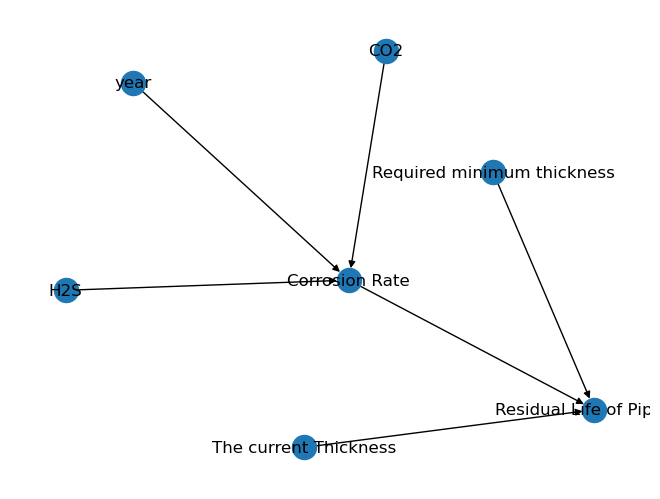

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
graph = nx.DiGraph()

# Add causal inference relationships as edges
graph.add_edge("The current Thickness", "Residual Life of Pipeline")
graph.add_edge("Required minimum thickness", "Residual Life of Pipeline")
graph.add_edge("Corrosion Rate", "Residual Life of Pipeline")
graph.add_edge("year", "Corrosion Rate")
graph.add_edge("CO2", "Corrosion Rate")
graph.add_edge("H2S", "Corrosion Rate")

# Draw the graph
nx.draw(graph, with_labels=True)
plt.show()


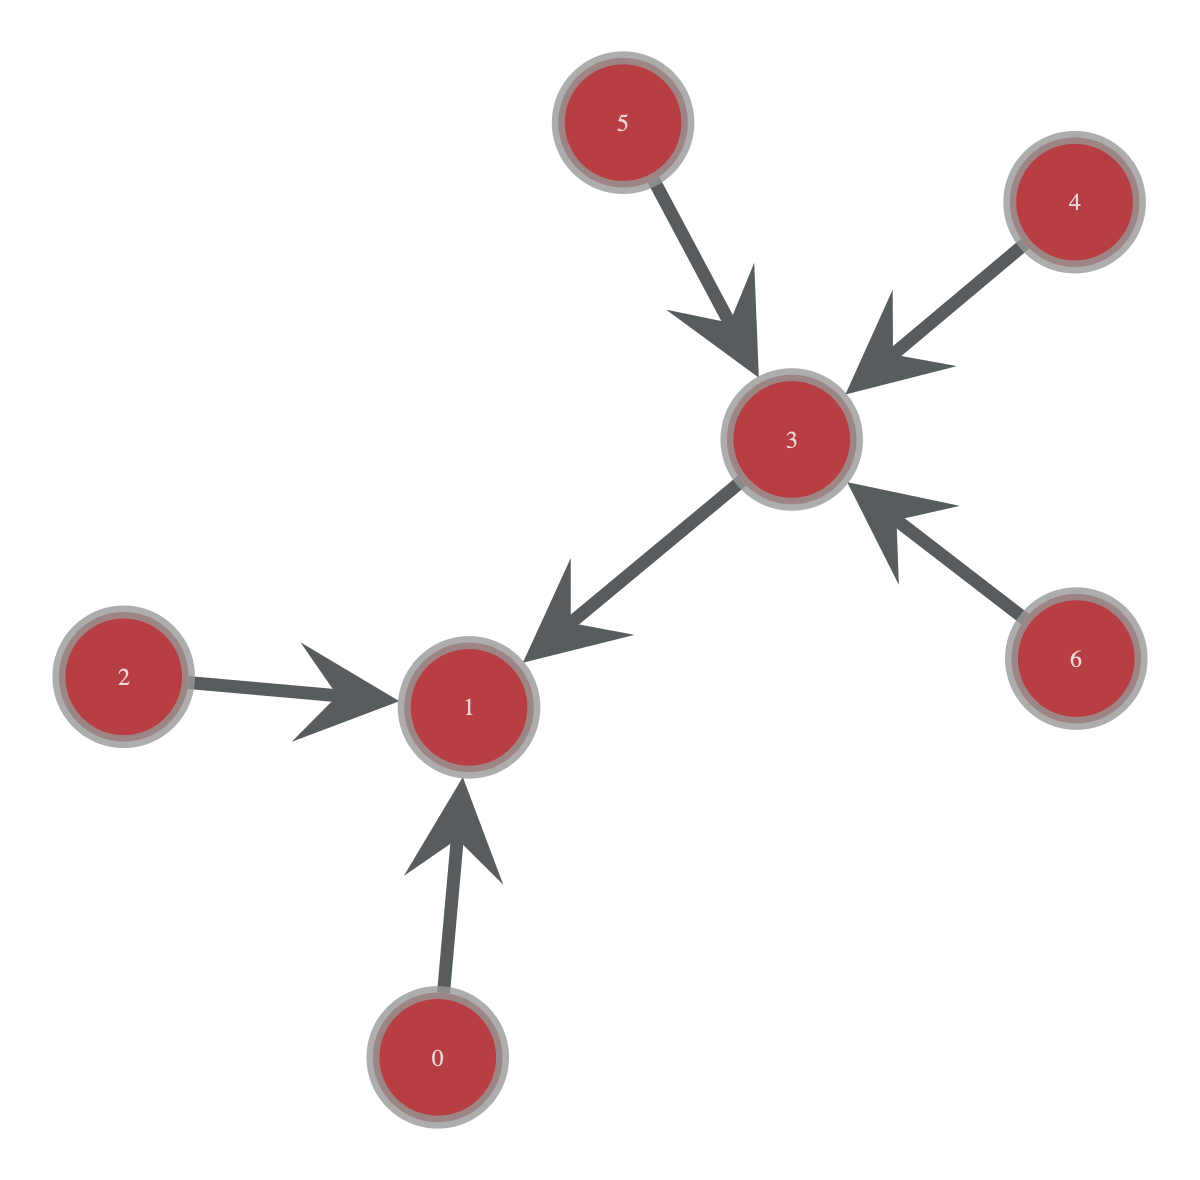

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x19d290b90, at 0x19d3d0190>

In [12]:
import graph_tool.all as gt

# Create a directed graph
graph = gt.Graph(directed=True)

# Add vertices with specific names
vertex_names = ["The current Thickness", "Residual Life of Pipeline",
                "Required minimum thickness", "Corrosion Rate", "year", "CO2", "H2S"]
vertices = []
name_prop = graph.new_vertex_property("string")
for name in vertex_names:
    v = graph.add_vertex()
    vertices.append(v)
    name_prop[v] = name

graph.vertex_properties["name"] = name_prop

# Add causal inference relationships as edges
graph.add_edge(vertices[0], vertices[1])
graph.add_edge(vertices[2], vertices[1])
graph.add_edge(vertices[3], vertices[1])
graph.add_edge(vertices[4], vertices[3])
graph.add_edge(vertices[5], vertices[3])
graph.add_edge(vertices[6], vertices[3])

# Draw the graph
gt.graph_draw(graph, vertex_text=graph.vertex_index, vertex_font_size=12, output="causal_graph.png")
gt.graph_draw(graph, vertex_text=graph.vertex_index, vertex_font_size=12, inline=True)


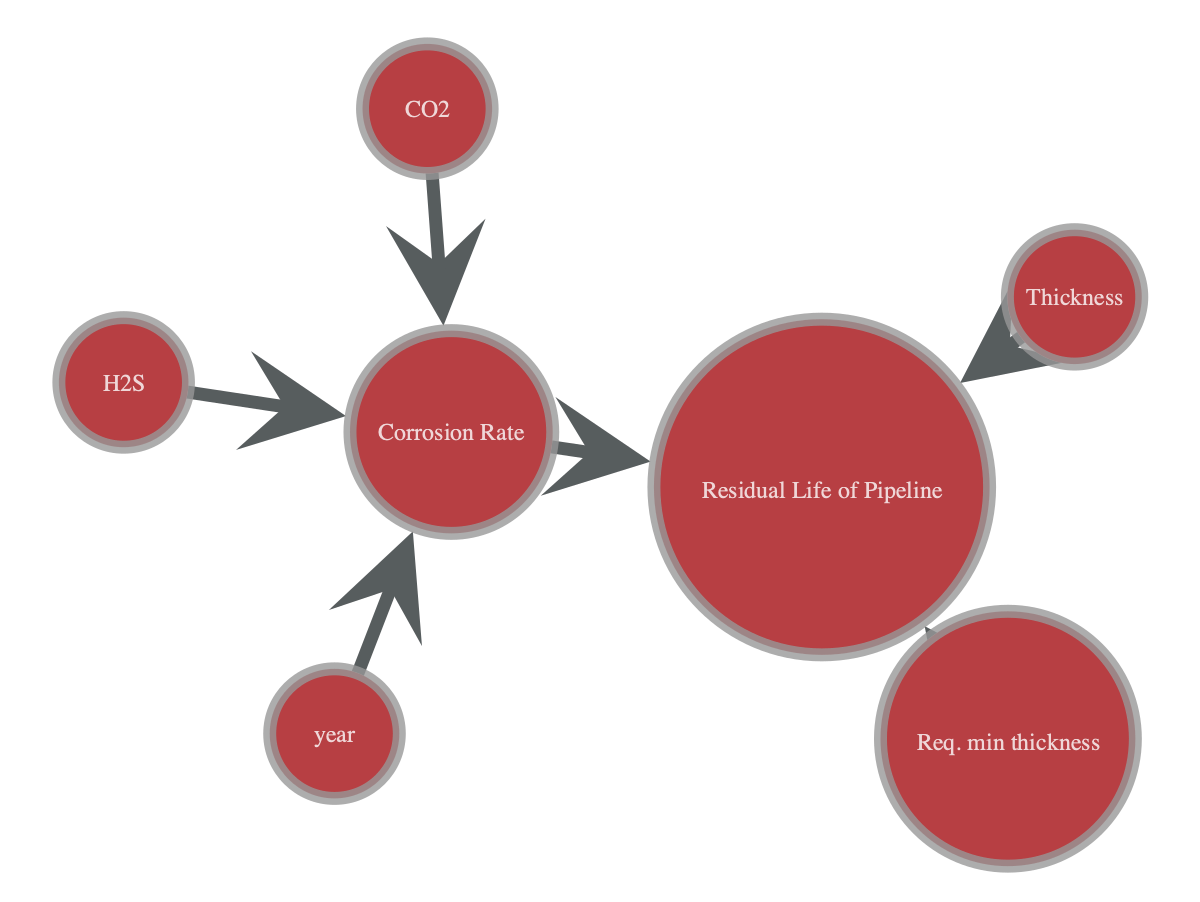

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x19d472210, at 0x19d424fd0>

In [8]:
import graph_tool.all as gt

# Create a directed graph
graph = gt.Graph(directed=True)

# Add vertices with specific names
vertex_names = ["Thickness", "Residual Life of Pipeline",
                "Req. min thickness", "Corrosion Rate", "year", "CO2", "H2S"]
vertices = []
name_prop = graph.new_vertex_property("string")
for name in vertex_names:
    v = graph.add_vertex()
    vertices.append(v)
    name_prop[v] = name

graph.vertex_properties["name"] = name_prop

# Add causal inference relationships as edges
graph.add_edge(vertices[0], vertices[1])
graph.add_edge(vertices[2], vertices[1])
graph.add_edge(vertices[3], vertices[1])
graph.add_edge(vertices[4], vertices[3])
graph.add_edge(vertices[5], vertices[3])
graph.add_edge(vertices[6], vertices[3])

# Draw the graph with actual names as labels
gt.graph_draw(graph, vertex_text=graph.vertex_properties["name"], vertex_font_size=12, output="causal_graph2.png")
gt.graph_draw(graph, vertex_text=graph.vertex_properties["name"], vertex_font_size=12, inline=True)


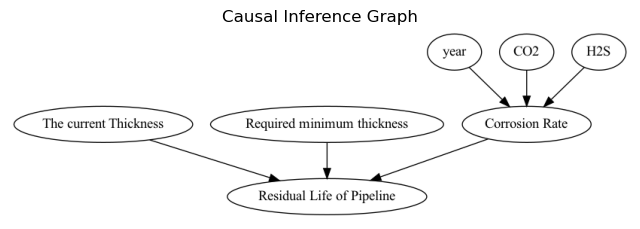

In [4]:
import pygraphviz as pgv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import io

# Create a directed graph
graph = pgv.AGraph(directed=True)

# Add causal inference relationships as edges
graph.add_edge("The current Thickness", "Residual Life of Pipeline")
graph.add_edge("Required minimum thickness", "Residual Life of Pipeline")
graph.add_edge("Corrosion Rate", "Residual Life of Pipeline")
graph.add_edge("year", "Corrosion Rate")
graph.add_edge("CO2", "Corrosion Rate")
graph.add_edge("H2S", "Corrosion Rate")

# Draw the graph using pygraphviz
image_data = graph.draw(format="png", prog="dot")

# Convert the image data to a PIL Image object
image = Image.open(io.BytesIO(image_data))

# Display the graph using matplotlib
plt.figure(figsize=(8, 6))
plt.axis("off")
plt.title("Causal Inference Graph")
plt.imshow(image)
plt.show()


In [9]:
import pygraphviz as pgv

# Create a new directed graph
G = pgv.AGraph(directed=True)

variables = ['LT', 'WT', 'CR', 'PCQ', 'H2S', 'CO2', 'Y', 'T', 'P', 'MA', 'GL', 'FT', 'FR']
G.add_nodes_from(variables)

# Add edges
edges = [('Y', 'PCQ'), ('Y', 'FT'), ('FT', 'H2S'), ('FT', 'CO2'), 
         ('H2S', 'CR'), ('CO2', 'CR'), ('PCQ', 'CR'), ('GL', 'T'), 
         ('T', 'CR'), ('FR', 'P'), ('P', 'CR'), ('MA', 'CR'), 
         ('CR', 'WT'), ('WT', 'LT')]

G.add_edges_from(edges)

# Draw the graph
G.layout(prog='dot') # use dot
G.draw('dag.png')


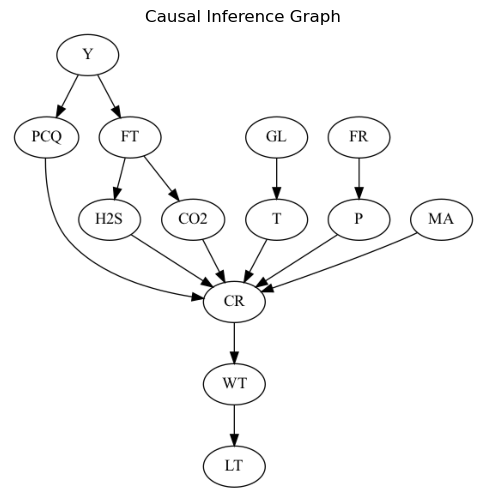

In [10]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Draw the graph using pygraphviz
image_data = G.draw(format="png", prog="dot")
# Convert the image data to a PIL Image object
image = Image.open(io.BytesIO(image_data))

# Display the graph using matplotlib
plt.figure(figsize=(8, 6))
plt.axis("off")
plt.title("Causal Inference Graph")
plt.imshow(image)
plt.show()

Wall Thickness (WT), Corrosion Rate (CR)
H2S Concentration,CO2 Concentration
Year of Manufacture/Installation (Y)
Paint Coating Quality (PCQ)
Temperature (T), Pressure (P)
Material/Alloy (MA), Soil/Water Chemistry (SWC)
Inspection and Maintenance frequency (IM)
Pipeline Usage (PU) - flow rate , Fluid Type 
Geographical Location (GL)

## DoWhy Example

Source from : https://github.com/ShawhinT/YouTube-Blog/blob/main/causal_inference/causal_inference_example.ipynb 
#### Another examples with DoWHy 
Source from: https://github.com/py-why/dowhy/tree/main/docs/source/example_notebooks


### 1st Trial ( 3 variables )

In [1]:
# Import libraries
import pickle
import matplotlib.pyplot as plt

import econml
import dowhy
from dowhy import CausalModel

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Data
df = pickle.load( open( "df_causal_inference.p", "rb" ) )

In [3]:
df

,age,hasGraduateDegree,greaterThan50k
0,39,False,False
1,50,False,False
2,38,False,False
3,53,False,False
5,37,True,False
...,...,...,...
32556,27,False,False
32557,40,False,True
32558,58,False,False
32559,22,False,False


In [5]:
# CAUSAL MODEL DEFINITION
model=CausalModel(
        data = df,
        treatment= "hasGraduateDegree", # change
        outcome= "greaterThan50k", 
        common_causes="age", #common
        )

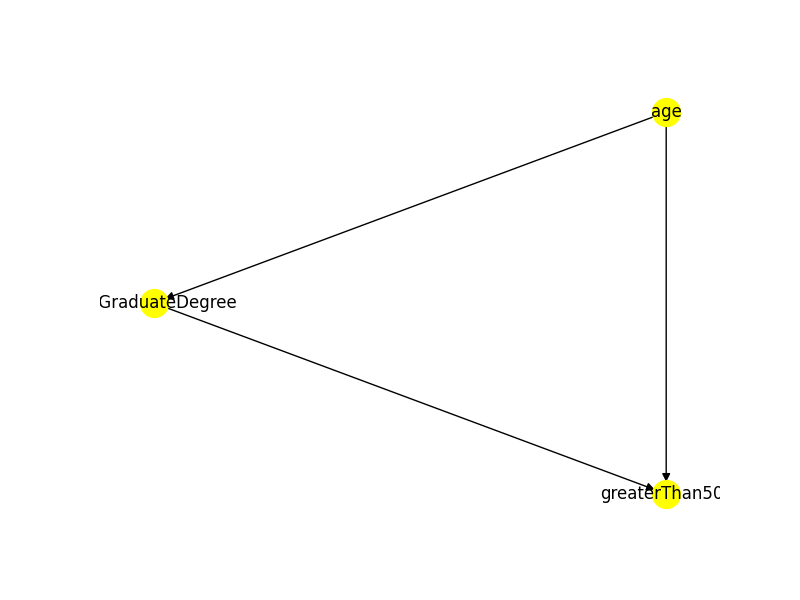

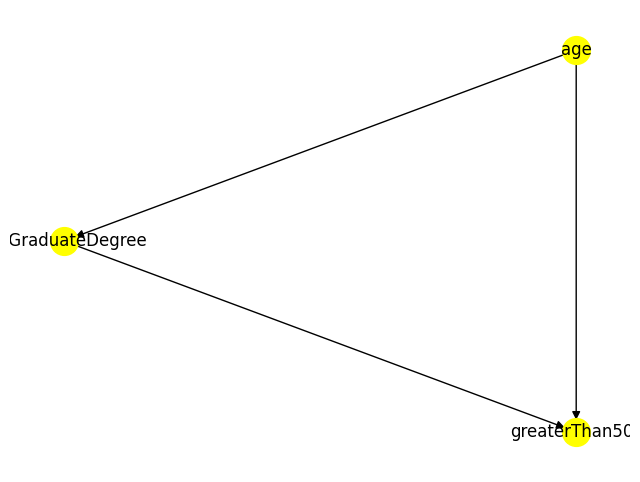

In [6]:
# View model (GRAPH)
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [7]:
#Generate estimand i.e. recipe for calculating causal effect
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



This is the output of DoWhy's identification step, which determines all the possible ways to estimate the causal effect of one variable on another based on the given causal graph. 

1. **Estimand type: NONPARAMETRIC_ATE**: This is the type of estimand being used. "Nonparametric" means the estimator makes no assumptions about the functional form of the relationship between the variables. "ATE" stands for Average Treatment Effect, which is the average effect of the treatment on the outcome over the population.

2. **Estimand : 1**: This is the first way that the causal effect could be estimated.

    - **Estimand name: backdoor**: The "backdoor" method is one way to estimate causal effects. It involves conditioning on a set of variables (in this case, 'age') to block backdoor paths from the treatment to the outcome. 

    - **Estimand expression**: This shows the effect being estimated. Here, it's the derivative of the expected value of 'greaterThan50k' given 'age' with respect to 'hasGraduateDegree'. In simpler terms, it means the change in the probability of earning more than 50k as a result of having a graduate degree, while keeping 'age' constant. 

    - **Estimand assumption 1, Unconfoundedness**: This is an assumption that must hold for the backdoor estimand to give an unbiased estimate of the causal effect. It says that, given the 'age' variable, there are no unobserved confounders that affect both 'hasGraduateDegree' and 'greaterThan50k'. If there are such unobserved confounders, the estimate could be biased.

3. **Estimand : 2 and Estimand : 3**: The fact that no variables were found for these estimands means that, based on the provided causal graph, there are no valid instrumental variables or frontdoor paths that could be used to estimate the causal effect. Instrumental variables and frontdoor paths are alternative methods for estimating causal effects when the backdoor criterion cannot be satisfied. The fact that none were found implies that the backdoor method is the only identified method to estimate the causal effect based on the provided causal graph.

In [8]:
#Compute causal effect using metaleaner
identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

from sklearn.ensemble import RandomForestRegressor
metalearner_estimate = model.estimate_effect(identified_estimand_experiment,
                                method_name="backdoor.econml.metalearners.TLearner",
                                confidence_intervals=False,
                                method_params={"init_params":{
                                                    'models': RandomForestRegressor()
                                                    },
                                               "fit_params":{}
                                              })
print(metalearner_estimate)

/Users/jeongdahye/opt/anaconda3/envs/base2/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/jeongdahye/opt/anaconda3/envs/base2/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  d

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age
Target units: ate

## Estimate
Mean value: 0.2030431270985236
Effect estimates: [[ 0.31847119]
 [ 0.19188205]
 [ 0.36235334]
 ...
 [ 0.14779057]
 [-0.01467127]
 [ 0.20365394]]



It's a linear regression of 'greaterThan50k' on 'hasGraduateDegree' and 'age'.
On average, having a graduate degree increases the probability of earning more than 50k by about 20.3%, after adjusting for age.
Each value represents the estimated effect of having a graduate degree on the likelihood of earning more than 50k for that specific individual, given their age. 

(array([  26.,  105.,  201., 6620., 1508., 6502., 8382., 3126., 2636.,
          64.]),
 array([-0.34685864, -0.25137799, -0.15589733, -0.06041668,  0.03506398,
         0.13054463,  0.22602529,  0.32150594,  0.4169866 ,  0.51246725,
         0.60794791]),
 <BarContainer object of 10 artists>)

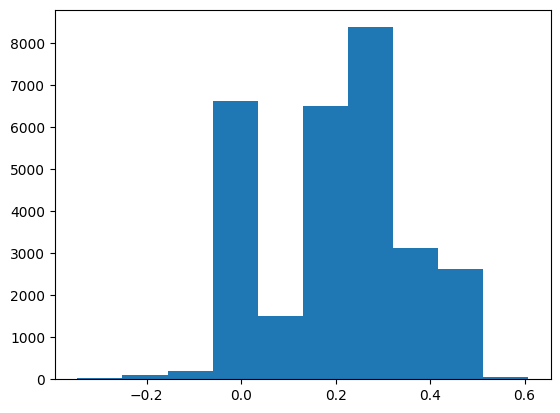

In [9]:
# print histogram of causal effects for each sample
plt.hist(metalearner_estimate.cate_estimates)

The treatment was "hasGraduateDegree", and the outcome was "greaterThan50k", meaning we were interested in how having a graduate degree (or not) influences the likelihood of earning more than 50k.
If the histogram is skewed to the right, for example, it suggests that the treatment (having a graduate degree) tends to have a more positive effect on the outcome (earning more than 50k) for most people in the dataset.

### DoWhy Trial (Corrosion)

In [5]:
#Synthetic data
import numpy as np
import pandas as pd
import random

# Setting a seed for reproducibility
np.random.seed(0)
random.seed(0)

# Number of samples
n_samples = 1000

# Generating synthetic data
corrosion_rate = np.random.uniform(low=0.1, high=10.0, size=n_samples) # Corrosion rate between 0.1 and 10
temperature = np.random.uniform(low=-50, high=50, size=n_samples) # Temperature between -50 and 50 degrees
pressure = np.random.uniform(low=1.0, high=10.0, size=n_samples) # Pressure between 1 and 10 atmospheres
cathodic_protection = np.random.uniform(low=0.5, high=2.0, size=n_samples) # Cathodic protection between 0.5 and 2
material = [random.choice(['Material_A', 'Material_B', 'Material_C', 'Material_D']) for _ in range(n_samples)] # Random choice of 4 materials

# Deriving thickness from other variables, adding some random noise
thickness = 0.5*corrosion_rate + 0.2*temperature + 0.1*pressure + 0.3*cathodic_protection + np.random.normal(0, 0.1, n_samples)

# Combining all these variables into a single DataFrame
data = pd.DataFrame({
    'corrosion_rate': corrosion_rate,
    'temperature': temperature,
    'pressure': pressure,
    'cathodic_protection': cathodic_protection,
    'material': material,
    'thickness': thickness
})

# Printing the first few rows of the DataFrame
print(data.head())


   corrosion_rate  temperature  pressure  cathodic_protection    material  \
0        5.533254     9.288027  8.303666             1.120944  Material_D   
1        7.180375   -48.993630  5.284756             1.444427  Material_D   
2        6.067357    -2.417380  5.708404             1.667876  Material_A   
3        5.494344    20.877039  3.254685             1.777337  Material_C   
4        4.294183   -45.602457  6.445387             1.724619  Material_D   

   thickness  
0   5.846579  
1  -5.420359  
2   3.583728  
3   7.690346  
4  -5.825993  


In [2]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel

# assuming you have the DataFrame 'df' with columns 'residual_lifetime', 'thickness', 'corrosion_rate', 'H2S', 'O2', 'temperature', 'pressure'
df = pd.DataFrame(np.random.rand(100, 7),
                  columns=['residual_lifetime', 'thickness', 'corrosion_rate', 'H2S', 'O2', 'temperature', 'pressure'])

# define the causal model, assuming the causal graph is as described
#  the goal of this model is to estimate the causal effects of 
# "thickness" and "corrosion_rate" on "residual_lifetime", 
# while controlling for the confounding effects of 'H2S', 'O2', 'temperature', and 'pressure'.
causal_graph = """
digraph {
    thickness -> residual_lifetime;
    corrosion_rate -> residual_lifetime;
    H2S -> thickness; H2S -> corrosion_rate;
    O2 -> thickness; O2 -> corrosion_rate;
    temperature -> thickness; temperature -> corrosion_rate;
    pressure -> thickness; pressure -> corrosion_rate;
    cathodic_protection -> thickness;
    coating_material -> thickness;
}
"""

causal_graph2 = """
digraph {
    corrosion_rate -> thickness;
    temperature -> thickness; temperature -> corrosion_rate;
    pressure -> thickness; pressure -> corrosion_rate;
    cathodic_protection -> thickness;
    material -> thickness;
}
"""
model = CausalModel(
    data = df,
    treatment = ['thickness', 'corrosion_rate'],
    outcome = 'residual_lifetime',
    graph = causal_graph
)
model2 = CausalModel(
    data = df,
    treatment = ['corrosion_rate'],
    outcome = 'thickness',
    graph = causal_graph2
)

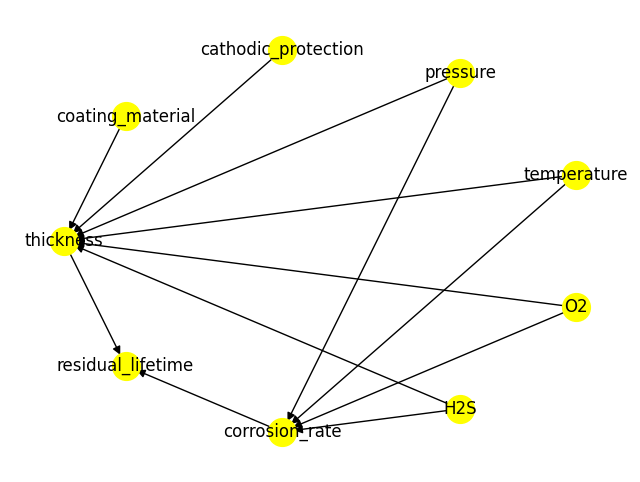

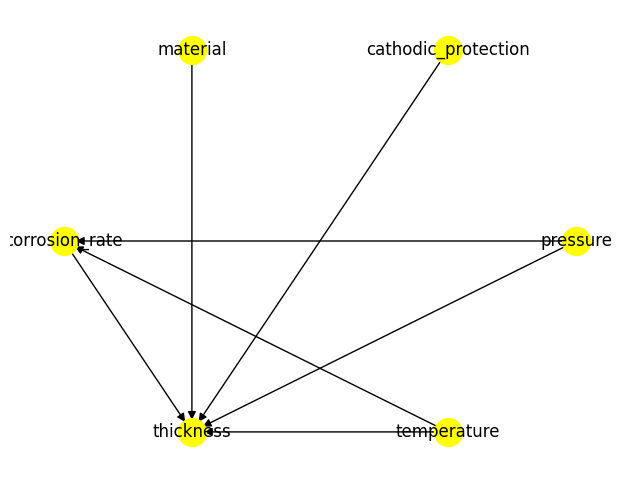

In [3]:
# visualize the model
model.view_model()
# visualize the model
model2.view_model()

##### Visualziation - pygraphviz

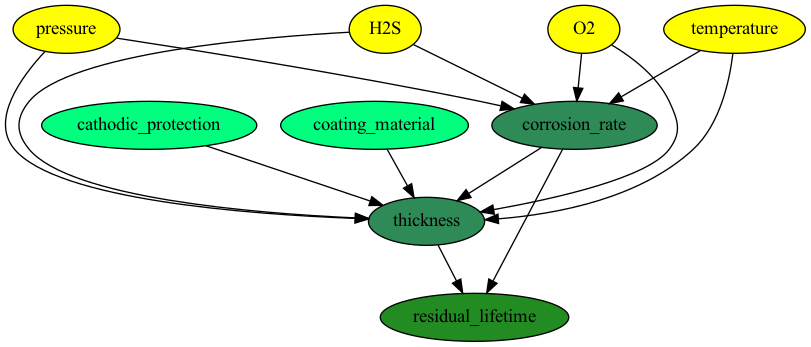

In [13]:
import pygraphviz as pgv
from IPython.display import Image

# Create a new directed graph
G = pgv.AGraph(directed=True)

# Add nodes
nodes = ['thickness', 'residual_lifetime', 'corrosion_rate', 'H2S', 'O2', 'temperature', 'pressure', 'cathodic_protection', 'coating_material']
for node in nodes:
    G.add_node(node)

# Add edges
edges = [('thickness', 'residual_lifetime'), ('corrosion_rate', 'thickness'), ('corrosion_rate', 'residual_lifetime'), ('H2S', 'thickness'), 
         ('H2S', 'corrosion_rate'), ('O2', 'thickness'), ('O2', 'corrosion_rate'), ('temperature', 'thickness'),
         ('temperature', 'corrosion_rate'), ('pressure', 'thickness'), ('pressure', 'corrosion_rate'),
         ('cathodic_protection', 'thickness'), ('coating_material', 'thickness')]
for edge in edges:
    G.add_edge(edge[0], edge[1])

# Color nodes
G.get_node('cathodic_protection').attr['fillcolor'] = 'springgreen'
G.get_node('cathodic_protection').attr['style'] = 'filled'
G.get_node('coating_material').attr['fillcolor'] = 'springgreen'
G.get_node('coating_material').attr['style'] = 'filled'

G.get_node('corrosion_rate').attr['fillcolor'] = 'seagreen'
G.get_node('corrosion_rate').attr['style'] = 'filled'
G.get_node('thickness').attr['fillcolor'] = 'seagreen'
G.get_node('thickness').attr['style'] = 'filled'
G.get_node('residual_lifetime').attr['fillcolor'] = 'forestgreen'
G.get_node('residual_lifetime').attr['style'] = 'filled'


G.get_node('H2S').attr['fillcolor'] = 'yellow'
G.get_node('H2S').attr['style'] = 'filled'
G.get_node('O2').attr['fillcolor'] = 'yellow'
G.get_node('O2').attr['style'] = 'filled'
G.get_node('temperature').attr['fillcolor'] = 'yellow'
G.get_node('temperature').attr['style'] = 'filled'
G.get_node('pressure').attr['fillcolor'] = 'yellow'
G.get_node('pressure').attr['style'] = 'filled'


# Draw the graph to a file
G.draw('dag.png', prog='dot', format='png')

# Display the image
Image(filename='dag.png')


Let's say the treatment is material? protection. 
Cofounding: pressure, H2S, O2, temperature

In [8]:
# Identify causal effect using backdoor criterion
identified_estimand = model2.identify_effect(proceed_when_unidentifiable=True)

# Estimate the causal effect using linear regression adjustment
estimate = model2.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Output causal effect and confidence intervals
print("Causal Estimate:", estimate.value)
print("Confidence Intervals:", estimate.get_confidence_intervals())


Causal Estimate: 0.5012703643024798
Confidence Intervals: (0.498868857082861, 0.5038245428203132)


Corrrosion rate increases the thickness with 50% 
95% of confident that the true average effect of corrosion rate on the thickness is between 49% ~ 50%.

In [9]:
# refuting the obtained estimate using random common cause
refute_results=model2.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refute_results)

# refuting the obtained estimate using a placebo treatment
refute_results=model2.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute")
print(refute_results)

# refuting the obtained estimate using data subset refuter
refute_results=model2.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_results)


Refute: Add a random common cause
Estimated effect:0.5012703643024798
New effect:0.5012735866884176
p value:0.9

Refute: Use a Placebo Treatment
Estimated effect:0.5012703643024798
New effect:0.0009494862064564603
p value:0.86

Refute: Use a subset of data
Estimated effect:0.5012703643024798
New effect:0.5013219838255007
p value:0.92



The results of the refutation tests suggest the following:

1. Refute: Add a random common cause:
   - Estimated effect: 0.332915368489915
   - New effect: 0.3332944761950477
   - p-value: 0.94

   When a random common cause variable is added, the estimated causal effect remains similar to the original estimate. The p-value of 0.94 suggests that the added random common cause does not significantly impact the causal effect estimation.

2. Refute: Use a Placebo Treatment:
   - Estimated effect: 0.332915368489915
   - New effect: 0.005900118140004474
   - p-value: 1.0

   When a placebo treatment is used, the estimated causal effect becomes substantially smaller (0.005900118140004474). The p-value of 1.0 suggests that the estimated effect is not statistically significant, indicating that the placebo treatment does not have a meaningful causal effect.

3. Refute: Use a subset of data:
   - Estimated effect: 0.332915368489915
   - New effect: 0.3295229826039723
   - p-value: 1.0

   When a subset of data is used, the estimated causal effect remains close to the original estimate (0.3295229826039723). The p-value of 1.0 indicates that the difference between the estimated effect and the new effect is not statistically significant.

Based on these results, it seems that the estimated causal effect (0.332915368489915) is relatively robust to the refutation tests performed. The addition of a random common cause, the use of a placebo treatment, and the selection of a subset of data did not significantly alter the estimated effect or provide evidence against the original estimate.

However, it is important to note that these refutation tests are based on specific assumptions and refutation methods. The results should be interpreted cautiously, considering the assumptions made and potential limitations of the analysis. It is always recommended to conduct further sensitivity analyses and evaluate the robustness of the causal effect estimation to ensure reliable and meaningful conclusions.

### Trial with the dataset

In [1]:
import pandas as pd

df = pd.read_excel('/Users/jeongdahye/Downloads/Dataset for internal CO2 corrosion of oil pipeline/Dataset for internal CO2 corrosion of oil pipeline.xlsx')

In [2]:
df

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Corrosion Inhibitor efficiency,Shear stress,pH,Corrosion rate,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,30,1.2,1.0,60,40,3,4.0,3.2,NaN,NaN,NaN
1,30,1.2,1.0,60,50,3,4.0,2.6,NaN,Parameter,Unit
2,30,1.2,1.0,60,60,3,4.0,2.1,NaN,Temperature,oC
3,30,1.2,1.0,65,40,3,4.0,3.1,NaN,Flow velocity,m/s
4,30,1.2,1.0,65,50,3,4.0,2.6,NaN,CO2 pressure,bar
...,...,...,...,...,...,...,...,...,...,...,...
238,50,1.8,2.0,65,50,5,3.9,6.3,NaN,NaN,NaN
239,50,1.8,2.0,65,60,5,3.9,5.0,NaN,NaN,NaN
240,50,1.8,2.0,70,40,5,3.9,7.5,NaN,NaN,NaN
241,50,1.8,2.0,70,50,5,3.9,6.2,NaN,NaN,NaN


In [3]:
df.columns

Index(['Temperature', 'Flow velocity', 'CO2 pressure', 'Internal pressure',
       'Corrosion Inhibitor efficiency', 'Shear stress', 'pH',
       'Corrosion rate', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

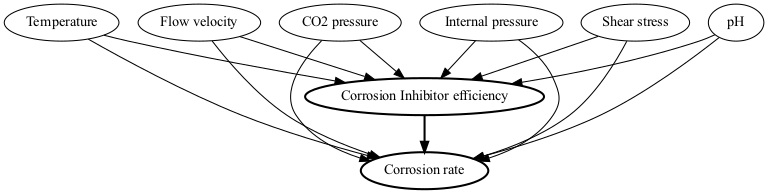

In [7]:
import numpy as np
import dowhy
from dowhy import CausalModel

# Step 1: Model the problem as a causal graph
model = CausalModel(
    data = df,
    treatment = 'Corrosion Inhibitor efficiency',
    outcome = 'Corrosion rate',
    common_causes = ['Temperature', 'Flow velocity', 'CO2 pressure', 'Internal pressure', 'Shear stress', 'pH'],
)

# -> this graphs should be automatically created (estimate the graphs - finding the arrows); Check if method estimate the graph 
# -> or Give the graphs as input to infere the causal effect ?

# visualize the model
model.view_model()

from IPython.display import Image
Image(filename="causal_model.png")

In [8]:
# Step 2: Identify the causal effect using properties of the graph
# Identify causal effect using backdoor criterion
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

# Step 3: Estimate the identified estimand using a statistical method
# Estimate the causal effect using linear regression adjustment
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Output causal effect and confidence intervals
print("Causal Estimate:", estimate.value)
print("Confidence Intervals:", estimate.get_confidence_intervals())


Causal Estimate: -0.08753086419753409
Confidence Intervals: [[-0.0915859  -0.08347583]]


Specifically, it indicates that an increase in the 'Corrosion Inhibitor efficiency' is associated with a decrease in the 'Corrosion rate'. 

In [9]:
# Step 4: Verify the robustness of the estimate using sensitivity analysis
# refuting the obtained estimate using random common cause
refute_results=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refute_results)

# refuting the obtained estimate using a placebo treatment
refute_results=model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute")
print(refute_results)

# refuting the obtained estimate using data subset refuter
refute_results=model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_results)


Refute: Add a random common cause
Estimated effect:-0.08753086419753409
New effect:-0.08752879152844958
p value:0.98

Refute: Use a Placebo Treatment
Estimated effect:-0.08753086419753409
New effect:-0.00021595496825844052
p value:0.96

Refute: Use a subset of data
Estimated effect:-0.08753086419753409
New effect:-0.08749606898883007
p value:0.94



## To compare different models 

In [10]:
import dowhy
from dowhy import CausalModel

# Define the causal model using a DAG
import dowhy.api

model = dowhy.CausalModel(
        data=data,
        treatment='X',
        outcome='Y',
        graph=causal_graph,
        estimator_type="backdoor.propensity_score_matching"
)

# Identify the causal effect
identified_estimand = model.identify_effect()

# Estimate the causal effect
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")


# Here, we define a simple causal model with two variables: X and Y
# Specify the causal relationships between X and Y in the DAG
# You can define the DAG using different syntaxes supported by DoWhy, such as DOT format or directly specifying the edges
causal_graph = """
digraph {
    X -> Y;
}
"""

# Create a CausalModel object
model = CausalModel(
    data=data,  # Specify your dataset
    graph=causal_graph,
    treatment='X',  # Specify the treatment variable
    outcome='Y'  # Specify the outcome variable
)

# Estimate the causal effect using the do method
causal_estimate = model.do('X').estimate_effect()

# Perform model comparison
model_comparison = model.compare([causal_graph1, causal_graph2, causal_graph3], method="my_method")

# Print the results
print("Causal Estimate:", causal_estimate.value)
print("Model Comparison Results:", model_comparison)


NodeNotFound: Either source X or target Y is not in G

In [11]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets


In [12]:
#synthetic data
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5, 
        num_instruments = 2,
        num_samples=10000, 
        treatment_is_binary=True)
df = data["df"]


In [13]:
data

{'df':        Z0        Z1        W0        W1        W2        W3        W4    v0  \
 0     1.0  0.518491  0.860030 -2.224798  0.867483  1.440762  0.308968  True   
 1     1.0  0.963834  0.627894 -1.250559  0.164651 -0.753915 -0.521260  True   
 2     1.0  0.416836  0.528896 -2.120039 -1.504536  1.030890 -0.601610  True   
 3     1.0  0.285669 -0.528212 -1.209263  0.605559 -1.729113 -0.934564  True   
 4     1.0  0.492429  0.464706 -1.862476 -1.035913  0.479065 -2.249969  True   
 ...   ...       ...       ...       ...       ...       ...       ...   ...   
 9995  1.0  0.687238  0.073605 -1.210341 -0.551808  1.744650 -1.089723  True   
 9996  1.0  0.776876 -1.799833  0.562229 -0.621722  1.134861 -0.875624  True   
 9997  0.0  0.728670  1.001497  0.093180  0.869702 -0.116006 -0.554588  True   
 9998  1.0  0.322526  0.935619 -0.182710 -0.180460  0.644916 -0.168620  True   
 9999  1.0  0.732426 -0.107992 -1.960810 -0.469214  1.780864  0.178162  True   
 
               y  
 0      9.504

In [14]:
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        instruments=data["instrument_names"])


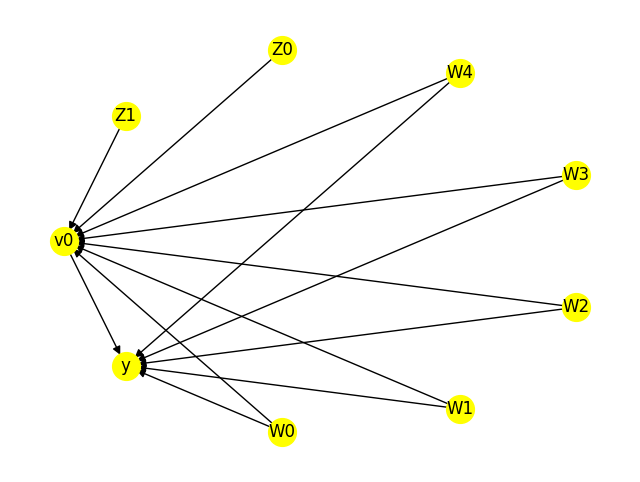

In [15]:
model.view_model()

In [16]:
identified_estimand = model.identify_effect()

In [17]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")

In [18]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute_results)

In [19]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter")
print(refute_results)

Refute: Use a Placebo Treatment
Estimated effect:10.101110030072515
New effect:-0.0007830571419659685
p value:0.9199999999999999



In [20]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter")
print(refute_results)

Refute: Use a subset of data
Estimated effect:10.101110030072515
New effect:10.156784579252454
p value:0.14



In [21]:
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print(estimate.value)  #treatment on the outcome

10.000409731200591


# Evaluating and Comparing Causal models - Bayesian Network , SEM and DAGs(DoWhy)

In [1]:
import pandas as pd
import numpy as np
import pygraphviz as pgv
import dowhy.api as dowhy
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from semopy import Model, sem

# Generate synthetic data for the example
np.random.seed(0)
n_samples = 1000
A = np.random.normal(0, 1, size=n_samples)
B = np.random.normal(0, 1, size=n_samples)
C = 0.5 * A + 0.8 * B + np.random.normal(0, 1, size=n_samples)
D = 0.2 * A + np.random.normal(0, 1, size=n_samples)
E = 0.3 * C + np.random.normal(0, 1, size=n_samples)

df = pd.DataFrame({"A": A, "B": B, "C": C, "D": D, "E": E})

# Define the SEM model
sem_model = Model(
    "SEM",
    manifest_vars=["A", "B", "C", "D", "E"],
    latent_vars=["Latent"],
    path_matrix=[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0.5, 0.8, 0, 0, 0], [0.2, 0, 0, 0, 0], [0, 0, 0.3, 0, 0]],
    latent_variances=[1],
)

# Fit the SEM model to the data
fit = sem(sem_model, df)

# Estimate causal effect in SEM
sem_effect = fit.get_causal_effect()

# Define the causal model using a DAG
causal_graph = """
digraph {
    A -> C;
    B -> C;
    A -> D;
    C -> E;
}
"""

# Create the causal model using doWhy and specify the treatment and outcome variables
model = dowhy.CausalModel(data=df, graph=causal_graph, treatment="A", outcome="E")

# Identify the causal effect using different methods
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Define the Bayesian Network
bayesian_model = BayesianModel([("A", "C"), ("B", "C"), ("A", "D"), ("C", "E")])

# Estimate the parameters of the Bayesian Network
bayesian_model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")

# Define the intervention
intervention = model.do("A")

# Compare the causal effects from different models
summary = dowhy.causal_estimator.refute_estimate(
    model,
    identified_estimand,
    estimate,
    method_name="random_common_cause",
    random_seed=0,
    num_simulations=100,
)

# Create a table of evaluation results
table = pd.DataFrame(
    {
        "Method": ["SEM", "doWhy", "Bayesian Network"],
        "Causal Effect Estimate": [sem_effect, estimate.value, bayesian_model.query(variables=["E"], evidence={"A": intervention})["E"]],
        "Refutation Result": summary.refutation_result,
        "Refutation Estimate": summary.new_effect_estimate,
    }
)

print(table)


ModuleNotFoundError: No module named 'pygraphviz'

# Python PKGS Comparison

pip install dowhy
pip install causalml

In [ ]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
from causalml.inference.meta import LRSRegressor
from sklearn.model_selection import train_test_split

# Creating a synthetic dataset
np.random.seed(0)
n = 10000  # number of samples
treatment = np.random.choice([0, 1], size=n)  # binary treatment
outcome = treatment + np.random.normal(scale=0.1, size=n)  # outcome is treatment + noise
covariates = np.random.normal(size=(n, 3))  # three additional covariates
data = pd.DataFrame({
    'treatment': treatment,
    'outcome': outcome,
    'covariate1': covariates[:, 0],
    'covariate2': covariates[:, 1],
    'covariate3': covariates[:, 2],
})

# Defining the causal model for DoWhy
model = CausalModel(
    data=data,
    treatment='treatment',
    outcome='outcome',
    common_causes=['covariate1', 'covariate2', 'covariate3'],
    proceed_when_unidentifiable=True
)

# Estimating the causal effect with DoWhy
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name='backdoor.propensity_score_stratification')
print(f"DoWhy estimated causal effect: {estimate.value}")

# Estimating the causal effect with CausalML
X = data[['covariate1', 'covariate2', 'covariate3']]
y = data['outcome']
treatment = data['treatment']
X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(X, y, treatment, test_size=0.2, random_state=42)
learner = LRSRegressor()
ate_causalml = learner.estimate_ate(X=X_train, treatment=treat_train, y=y_train)
print(f"CausalML estimated ATE: {ate_causalml[0][0]}")


pip install causalnex
pip install econml


In [ ]:
import numpy as np
import pandas as pd
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
from causalnex.discretiser import Discretiser
from causalnex.evaluation import classification_report
from econml.dml import LinearDMLCateEstimator
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create synthetic dataset
np.random.seed(0)
n = 10000
treatment = np.random.choice([0, 1], size=n)
outcome = treatment + np.random.normal(scale=0.1, size=n)
covariates = np.random.normal(size=(n, 3))
data = pd.DataFrame({
    'treatment': treatment,
    'outcome': outcome,
    'covariate1': covariates[:, 0],
    'covariate2': covariates[:, 1],
    'covariate3': covariates[:, 2],
})

# Define causal model for CausalNex
sm = StructureModel()
sm.add_edges_from([
    ('treatment', 'outcome'),
    ('covariate1', 'outcome'),
    ('covariate2', 'outcome'),
    ('covariate3', 'outcome')
])
sm = from_pandas(data, tabu_edges=[("outcome", "treatment")], w_threshold=0.8)
bn = BayesianNetwork(sm)
discretised_data = data.copy()
discretised_data["outcome"] = Discretiser(method="fixed", numeric_split_points=[0, 1]).transform(data["outcome"].values)
bn = bn.fit_node_states(discretised_data)
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")
classification_report(bn, discretised_data, "outcome")

# Define causal model for EconML
X = data[['covariate1', 'covariate2', 'covariate3']]
y = data['outcome']
treatment = data['treatment'].to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test, treat_train, treat_test = train_test_split(X, y, treatment, test_size=0.2, random_state=42)
model_y=DummyRegressor(strategy='mean')
model_t=DummyRegressor(strategy='mean')
est = LinearDMLCateEstimator(model_y=model_y, model_t=model_t, discrete_treatment=False)
est.fit(y_train, treat_train, X_train)
ate_econml = est.effect(np.mean(X_train, axis=0).reshape(1,-1))
print(f"EconML estimated ATE: {ate_econml[0]}")


In [ ]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
from causalml.inference.meta import LRSRegressor
from causalnex.structure.notears import from_pandas
from causalnex.network import BayesianNetwork
from econml.dml import LinearDMLCateEstimator
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Function to generate synthetic data
def generate_data(n, treatment_effect, noise, confounding):
    # ...

# Function for each method
def dowhy_method(data):
    # ...
    return estimate

def causalml_method(data):
    # ...
    return ate_causalml

def causalnex_method(data):
    # ...
    return bn

def econml_method(data):
    # ...
    return ate_econml

# Define your conditions
conditions = [
    {"n": 1000, "treatment_effect": 1, "noise": 0.1, "confounding": True},
    # ...
]

# Define your methods
methods = [dowhy_method, causalml_method, causalnex_method, econml_method]

# Loop over conditions and methods
results = []
for condition in conditions:
    data = generate_data(**condition)
    for method in methods:
        estimate = method(data)
        error = calculate_error(estimate, condition["treatment_effect"])
        results.append({
            "condition": condition,
            "method": method.__name__,
            "estimate": estimate,
            "error": error
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Analyze and visualize your results
# ...


1. Generate Synthetic Data with Known Causal Effect:
Create synthetic data where the causal effect is known. For example, if Y is the outcome, T is the treatment, and X are other covariates, you might generate data such that Y = T * causal_effect + X * beta + error. In this case, the true causal effect is known.

2. Apply the Causal Inference Method and Measure Time:

For each package/method:

Record the start time using a function like time.perf_counter() from the time module in Python.
Apply the causal inference method to estimate the causal effect.
Record the end time.
The difference between the end time and the start time gives the computation time.
3. Calculate the Mean Squared Error (MSE):

Subtract the estimated causal effect from the true causal effect for each sample in your synthetic data. This gives you the errors.
Square each error.
Calculate the mean of these squared errors. This gives you the MSE.

In [ ]:
import numpy as np
import time
from sklearn.metrics import mean_squared_error

# Assume we have some synthetic_data, true_causal_effect, and a function estimate_causal_effect

start_time = time.perf_counter()

estimated_causal_effect = estimate_causal_effect(synthetic_data)

end_time = time.perf_counter()

computation_time = end_time - start_time

mse = mean_squared_error(true_causal_effect, estimated_causal_effect)

print("Computation Time: ", computation_time)
print("Mean Squared Error: ", mse)


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt

alpha = 3 
beta1 = 0.5
beta2 = 0.6
beta3 = 0.7
gamma1 = 2
gamma2 = 3
    
    # Generate confounders
X1 = np.random.normal(0, 1, size=1000000)
X2 = np.random.normal(0, 1, size=1000000)
X3 = np.random.normal(0, 1, size=1000000)
    
T = beta1 * X1 +  + beta2 * X2 + beta3 * X3 + np.random.normal(loc=0, scale=1, size=1000000)
M = gamma1 * T + beta2 * X2 + np.random.normal(loc=0, scale=0.5, size=1000000)
Y = alpha +  gamma2* T + gamma1 * M + beta1* X1 + beta2 * X2 + beta3 * X3 + np.random.normal(loc=0, scale=1, size=1000000)
data1 = pd.DataFrame({'Intervention': T, 'Mediator': M, 'X1': X1, 'X2': X2, 'X3': X3, 'Outcome': Y})
print(data1)


        Intervention  Mediator        X1        X2        X3    Outcome
0           2.402139  3.764024  0.874682  0.203750  1.218306  17.914669
1           1.585029  4.336737 -1.854600  1.765495  0.382979  17.723174
2           0.344088  1.502160  1.648057  1.041234 -0.504989   6.666908
3           1.456517  3.658509 -0.003902  0.265905  0.655834  16.599977
4           0.871928  1.995822  0.744340  0.513082 -0.973769  10.613825
...              ...       ...       ...       ...       ...        ...
999995      1.640231  2.382318  1.320347 -0.704769 -0.642773  13.984020
999996      1.755046  2.895500 -0.159377 -1.603006  1.620679  13.525090
999997     -2.057039 -4.343625 -1.650183 -0.240923  0.313541 -12.368827
999998      2.680699  6.199523 -0.060860  1.898762  0.762516  24.621476
999999     -1.004717 -2.905603  0.724234 -1.377783 -0.785078  -7.122673

[1000000 rows x 6 columns]


In [2]:
correlations = data1.corrwith(data1['Outcome'])

# Display correlations
for col, corr in correlations.items():
    print(f"Correlation between {col} and Outcome:", corr)


Correlation between Intervention and Outcome: 0.987399979369883
Correlation between Mediator and Outcome: 0.9892786618630591
Correlation between X1 and Outcome: 0.4947252355575682
Correlation between X2 and Outcome: 0.4671289108377761
Correlation between X3 and Outcome: 0.3815360928086552
Correlation between Outcome and Outcome: 1.0


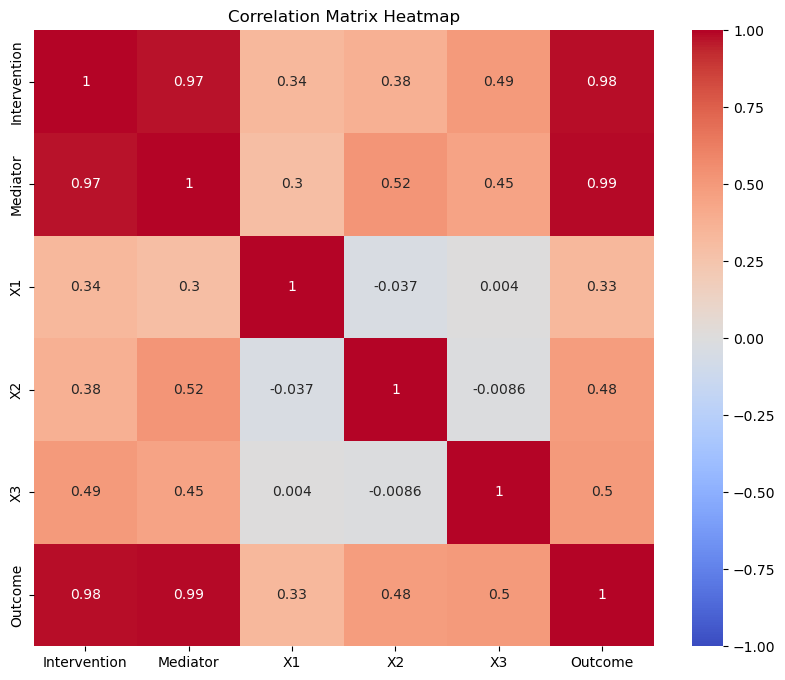

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Set title and show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

In [2]:
from itertools import combinations
from scipy.stats import norm
import numpy as np
import math
from typing import List

def get_neighbors(G, x: int, y: int):
    return [i for i in range(len(G)) if G[x][i] == True and i != y]

def gauss_ci_test(suff_stat, x: int, y: int, K: List[int], cut_at: float = 0.9999999):
    """条件独立性检验"""
    C = suff_stat["C"]
    n = suff_stat["n"]

    # ------ 偏相关系数 ------
    if len(K) == 0:  # K 为空
        r = C[x, y]

    elif len(K) == 1:  # K 中只有一个点，即一阶偏相关系数
        k = K[0]
        r = (C[x, y] - C[x, k] * C[y, k]) / math.sqrt((1 - C[y, k] ** 2) * (1 - C[x, k] ** 2))

    else:  # 其实我没太明白这里是怎么求的，但 R 语言的 pcalg 包就是这样写的
        m = C[np.ix_([x] + [y] + K, [x] + [y] + K)]
        p = np.linalg.pinv(m)
        r = -p[0, 1] / math.sqrt(abs(p[0, 0] * p[1, 1]))

    r = min(cut_at, max(-cut_at, r))

    # Fisher's z-transform
    z = 0.5 * math.log1p((2 * r) / (1 - r))
    z_standard = z * math.sqrt(n - len(K) - 3)

    # Φ^{-1}(1-α/2)
    p_value = 2 * (1 - norm.cdf(abs(z_standard)))

    return p_value

def skeleton(suff_stat, alpha: float):
    n_nodes = suff_stat["C"].shape[0]

    # 分离集
    O = [[[] for _ in range(n_nodes)] for _ in range(n_nodes)]

    # 完全无向图
    G = [[i != j for i in range(n_nodes)] for j in range(n_nodes)]

    # 点对（不包括 i -- i）
    pairs = [(i, (n_nodes - j - 1)) for i in range(n_nodes) for j in range(n_nodes - i - 1)]

    done = False
    l = 0  # 节点数为 l 的子集

    while done != True and any(G):
        done = True

        # 遍历每个相邻点对
        for x, y in pairs:
            if G[x][y] == True:
                neighbors = get_neighbors(G, x, y)  # adj(C,x) \ {y}

                if len(neighbors) >= l:  # |adj(C, x) \ {y}| > l
                    done = False

                    # |adj(C, x) \ {y}| = l
                    for K in set(combinations(neighbors, l)):
                        # 节点 x, y 是否被节点数为 l 的子集 K d-seperation
                        # 条件独立性检验，返回 p-value
                        p_value = gauss_ci_test(suff_stat, x, y, list(K))

                        # 条件独立
                        if p_value >= alpha:
                            G[x][y] = G[y][x] = False  # 去掉边 x -- y
                            O[x][y] = O[y][x] = list(K)  # 把 K 加入分离集 O
                            break

        l += 1

    return np.asarray(G, dtype=int), O

def extend_cpdag(G, O):
    n_nodes = G.shape[0]

    def rule1(g):
        """Rule 1: 如果存在链 i -> j - k ，且 i, k 不相邻，则变为 i -> j -> k"""
        pairs = [(i, j) for i in range(n_nodes) for j in range(n_nodes) if g[i][j] == 1 and g[j][i] == 0]  # 所有 i - j 点对

        for i, j in pairs:
            all_k = [k for k in range(n_nodes) if (g[j][k] == 1 and g[k][j] == 1) and (g[i][k] == 0 and g[k][i] == 0)]

            if len(all_k) > 0:
                g[j][all_k] = 1
                g[all_k][j] = 0

        return g

    def rule2(g):
        """Rule 2: 如果存在链 i -> k -> j ，则把 i - j 变为 i -> j"""
        pairs = [(i, j) for i in range(n_nodes) for j in range(n_nodes) if g[i][j] == 1 and g[j][i] == 1]  # 所有 i - j 点对

        for i, j in pairs:
            all_k = [k for k in range(n_nodes) if (g[i][k] == 1 and g[k][i] == 0) and (g[k][j] == 1 and g[j][k] == 0)]

            if len(all_k) > 0:
                g[i][j] = 1
                g[j][1] = 0

        return g

    def rule3(g):
        """Rule 3: 如果存在 i - k1 -> j 和 i - k2 -> j ，且 k1, k2 不相邻，则把 i - j 变为 i -> j"""
        pairs = [(i, j) for i in range(n_nodes) for j in range(n_nodes) if g[i][j] == 1 and g[j][i] == 1]  # 所有 i - j 点对

        for i, j in pairs:
            all_k = [k for k in range(n_nodes) if (g[i][k] == 1 and g[k][i] == 1) and (g[k][j] == 1 and g[j][k] == 0)]

            if len(all_k) >= 2:
                for k1, k2 in combinations(all_k, 2):
                    if g[k1][k2] == 0 and g[k2][k1] == 0:
                        g[i][j] = 1
                        g[j][i] = 0
                        break

        return g

    # Rule 4: 如果存在链 i - k -> l 和 k -> l -> j，且 k 和 l 不相邻，把 i - j 改为 i -> j
    # 显然，这种情况不可能存在，所以不需要考虑 rule4

    # 相邻点对
    pairs = [(i, j) for i in range(n_nodes) for j in range(n_nodes) if G[i][j] == 1]

    # 把 x - y - z 变为 x -> y <- z
    for x, y in sorted(pairs, key=lambda x:(x[1], x[0])):
        all_z = [z for z in range(n_nodes) if G[y][z] == 1 and z != x]

        for z in all_z:
            if G[x][z] == 0 and y not in O[x][z]:
                G[x][y] = G[z][y] = 1
                G[y][x] = G[y][z] = 0

    # Orientation rule 1 - rule 3
    old_G = np.zeros((n_nodes, n_nodes))

    while not np.array_equal(old_G, G):
        old_G = G.copy()

        G = rule1(G)
        G = rule2(G)
        G = rule3(G)

    return np.array(G)

def pc(suff_stat, alpha: float = 0.05, verbose: bool = False):
    G, O = skeleton(suff_stat, alpha)  # 骨架
    cpdag = extend_cpdag(G, O)  # 扩展为 CPDAG

    if verbose:
        print(cpdag)

    return cpdag

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Optional

chains = []

def dfs(graph, k: int, chain: List[int], visit: List[bool]):
    """因果关系链深搜"""
    flag = False

    for i in range(len(graph)):
        if graph[i][k] == 1 and not visit[i] :
            flag =True
            visit[i] = True
            chain.append(i)

            dfs(graph, i, chain, visit)

            chain.pop()
            visit[i] = False

    if not flag:
        chains.append(chain.copy())

def get_causal_chains(graph, start: int, labels: List[str]):
    global chains
    chains = []

    visit = [False for _ in range(len(labels))]
    visit[start] = True

    chain = [start]

    dfs(graph, start, chain, visit)

    return "\n".join([" <- ".join(list(map(lambda x: labels[x] + f" ({x})", c))) for c in chains])

def plot(graph, labels, path=None):
    import matplotlib.pyplot as plt
    import networkx as nx
    
    # Convert list of labels to dictionary format
    label_dict = {i: labels[i] for i in range(len(labels))}
    
    G = nx.Graph(graph)
    nx.draw(G, with_labels=True, labels=label_dict)
    
    if path:
        plt.savefig(path)
    else:
        plt.show()


[[0 0 0 1 0 1]
 [0 0 0 1 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]
X1 (2)


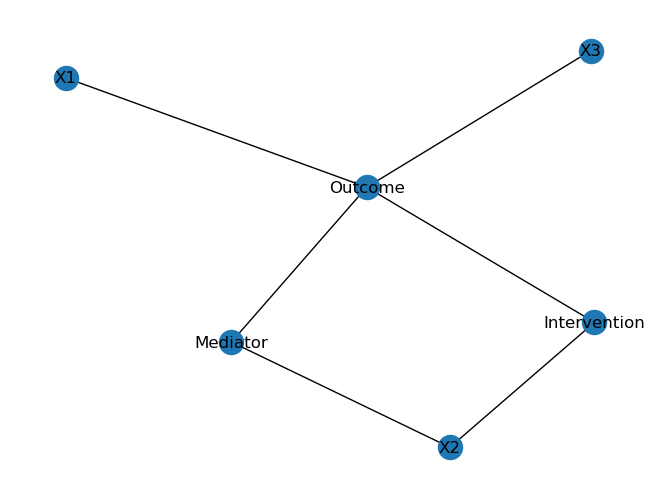

In [4]:
import pandas as pd

if __name__ == '__main__':
    
    data = data1
    n_nodes = data.shape[1]
    labels = data.columns.to_list()

    p = pc(
        suff_stat = { "C": data.corr().values, "n": data.shape[0] },
        verbose = True
    )

    # DFS 因果关系链
    print(get_causal_chains(p, start=2, labels=labels))

    # plotting
    plot(p, labels)

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# This activates the automatic conversion for rpy2
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

# Use R's "base" package
base = importr('base')

# Execute simple R command and print its output
result = robjects.r('''
  cat("Running R code from Python\n")
  2 + 2
''')
print(result)

Running R code from Python
[4.]


In [8]:
import rpy2.robjects as robjects

# Use R commands to install the required packages
robjects.r('''
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("RBGL")
''')

robjects.r('''
install.packages("pcalg")
''')

import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# This activates the automatic conversion for rpy2
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.1 (2022-06-23)

R[write to console]: Old packages: 'Matrix', 'MatrixModels'



Update all/some/none? [a/s/n]: 
  There are binary versions available but the source versions are later:
              binary source needs_compilation
Matrix       1.5-4.1  1.6-1              TRUE
MatrixModels   0.5-1  0.5-2             FALSE



R[write to console]: 소스형태의 패키지 ‘Matrix’, ‘MatrixModels’(들)를 설치합니다.


R[write to console]: URL 'https://cloud.r-project.org/src/contrib/Matrix_1.6-1.tar.gz'을 시도합니다

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2064299 bytes (2.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -I/usr/local/include   -fPIC  -Wall -g -O2  -c CHMfactor.c -o CHMfactor.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -I/usr/local/include   -fPIC  -Wall -g -O2  -c Csparse.c -o Csparse.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -I/usr/local/include   -fPIC  -Wall -g -O2  -c init.c -o init.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -I/usr/local/include   -fPIC  -Wall -g -O2  -c Mutils.c -o Mutils.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -DNTIMER -I./SuiteSparse_config -DUSE_FC_LEN_T  -I/u

In file included from ../Core/cholmod_change_factor.c:113:
../Core/t_cholmod_change_factor.c:37:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
In file included from ../Core/cholmod_change_factor.c:115:
../Core/t_cholmod_change_factor.c:37:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
../Core/cholmod_change_factor.c:262:17: warning: variable 'xsize' set but not used [-Wunused-but-set-variable]
    Int nsuper, xsize, ssize ;
                ^
../Core/cholmod_change_factor.c:676:13: warning: variable 'Lx' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
            ^
../Core/cholmod_change_factor.c:676:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
../Core/cholmod_change_factor.c:677:10: warning: variable 'Lp' set but not used [-Wunused-but-set-variable]
    Int *Lp, *Li, *Ln

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_common.c -o cholmod_common.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_complex.c -o cholmod_complex.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_copy.c -o cholmod_copy.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.frame

../Core/cholmod_copy.c:275:21: warning: variable 'up' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, up, lo, values, diag, astype ;
                    ^
../Core/cholmod_copy.c:275:25: warning: variable 'lo' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, up, lo, values, diag, astype ;
                        ^
2 warnings generated.
In file included from ../Core/cholmod_dense.c:45:
../Core/t_cholmod_dense.c:27:13: warning: variable 'Ax' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
            ^
../Core/t_cholmod_dense.c:27:23: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
                      ^
../Core/t_cholmod_dense.c:27:28: warning: variable 'Xz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
                           ^
In file included from ../Core/cholmod_dense.c:47:
../Core/t_cholmod_dense.c:27:23: warning: variable 'Az' set but 

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_error.c -o cholmod_error.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_factor.c -o cholmod_factor.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_memory.c -o cholmod_memory.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.frame

../Core/cholmod_memory.c:121:12: warning: unused variable 's' [-Wunused-variable]
    size_t s ;
           ^
../Core/cholmod_memory.c:311:12: warning: unused variable 's' [-Wunused-variable]
    size_t s ;
           ^
2 warnings generated.
../Core/cholmod_sparse.c:485:35: warning: variable 'nzmax' set but not used [-Wunused-but-set-variable]
    Int p, pend, j, ncol, packed, nzmax, nz, xtype ;
                                  ^
1 warning generated.
In file included from ../Core/cholmod_transpose.c:121:
../Core/t_cholmod_transpose.c:42:13: warning: variable 'Ax' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
            ^
../Core/t_cholmod_transpose.c:42:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
                 ^
../Core/t_cholmod_transpose.c:42:23: warning: variable 'Fx' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
                      ^
../Core/t_cholmod_tra

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_transpose.c -o cholmod_transpose.o


56 warnings generated.
In file included from ../Core/cholmod_triplet.c:105:
../Core/t_cholmod_triplet.c:28:13: warning: variable 'Rx' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
            ^
../Core/t_cholmod_triplet.c:28:18: warning: variable 'Rz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                 ^
../Core/t_cholmod_triplet.c:28:23: warning: variable 'Tx' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                      ^
../Core/t_cholmod_triplet.c:28:28: warning: variable 'Tz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                           ^
In file included from ../Core/cholmod_triplet.c:107:
../Core/t_cholmod_triplet.c:28:18: warning: variable 'Rz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                 ^
../Core/t_cholmod_triplet.c:28:28: warning: variable 'Tz' set but not used [-Wunused-but-se

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_triplet.c -o cholmod_triplet.o


10 warnings generated.
../Check/cholmod_check.c:204:61: warning: variable 'init_print' set but not used [-Wunused-but-set-variable]
    Int i, nrow, nmethods, ordering, xworksize, amd_backup, init_print ;
                                                            ^
../Check/cholmod_check.c:950:37: warning: variable 'nz' set but not used [-Wunused-but-set-variable]
    Int i, j, d, nrow, ncol, nzmax, nz, init_print, count, xtype ;
                                    ^


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Core/cholmod_version.c -o cholmod_version.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Check/cholmod_check.c -o cholmod_check.o


../Check/cholmod_check.c:1494:38: warning: variable 'ordering' set but not used [-Wunused-but-set-variable]
    Int n, nzmax, j, p, pend, i, nz, ordering, space, is_monotonic, minor,
                                     ^
../Check/cholmod_check.c:1495:9: warning: variable 'precise' set but not used [-Wunused-but-set-variable]
        count, precise, init_print, ilast, lnz, head, tail, jprev, plast,
               ^
../Check/cholmod_check.c:1497:2: warning: variable 'ps2' set but not used [-Wunused-but-set-variable]
        ps2, psxend, ssize, xsize, maxcsize, maxesize, nsrow2, jj, ii, xtype ;
        ^
5 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Check/cholmod_read.c -o cholmod_read.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Check/cholmod_write.c -o cholmod_write.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_amd.c -o cholmod_amd.o


../Check/cholmod_write.c:366:33: warning: variable 'symmetry' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, is_complex, symmetry, i, j, q, iz, p, nz, is_binary, stype,
                                ^
1 warning generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_analyze.c -o cholmod_analyze.o


../Cholesky/cholmod_analyze.c:416:35: warning: variable 'Cmember' set but not used [-Wunused-but-set-variable]
    Int *First, *Level, *Work4n, *Cmember, *CParent, *ColCount, *Lperm, *Parent,
                                  ^
../Cholesky/cholmod_analyze.c:416:45: warning: variable 'CParent' set but not used [-Wunused-but-set-variable]
    Int *First, *Level, *Work4n, *Cmember, *CParent, *ColCount, *Lperm, *Parent,
                                            ^
../Cholesky/cholmod_analyze.c:419:69: warning: variable 'ncol' set but not used [-Wunused-but-set-variable]
    Int k, n, ordering, method, nmethods, status, default_strategy, ncol, uncol,
                                                                    ^
3 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_colamd.c -o cholmod_colamd.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_etree.c -o cholmod_etree.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_factorize.c -o cholmod_factorize.o
clang -mmacosx-version-min=10.13 -I"/Library/

../Cholesky/cholmod_factorize.c:111:37: warning: variable 'n' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, stype, convert, n, nsuper, grow2, status ;
                                    ^
1 warning generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_rcond.c -o cholmod_rcond.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_resymbol.c -o cholmod_resymbol.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_rowcolcounts.c -o cholmod_rowcolcounts.o
clang -mmacosx-version-min=10.13 -I

In file included from ../Cholesky/cholmod_rowfac.c:161:
../Cholesky/t_cholmod_rowfac.c:46:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                 ^
../Cholesky/t_cholmod_rowfac.c:46:28: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                           ^
../Cholesky/t_cholmod_rowfac.c:46:38: warning: variable 'Wz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                                     ^
../Cholesky/t_cholmod_rowfac.c:46:48: warning: variable 'Fz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                                               ^
../Cholesky/t_cholmod_rowfac.c:50:46: warning: variable 'nzmax' set but not used [-Wunused-but-set-variable]
        use_dbound, packed, stype, Fpacked, sorted, nzmax, len, par

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_solve.c -o cholmod_solve.o


3 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Cholesky/cholmod_spsolve.c -o cholmod_spsolve.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../MatrixOps/cholmod_drop.c -o cholmod_drop.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../MatrixOps/cholmod_horzcat.c -o cholmod_horzcat.o
clang -mmacosx-version-min=10.13 -I"/Library/Fr

In file included from ../MatrixOps/cholmod_sdmult.c:44:
../MatrixOps/t_cholmod_sdmult.c:49:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                 ^
../MatrixOps/t_cholmod_sdmult.c:49:28: warning: variable 'Xz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                           ^
../MatrixOps/t_cholmod_sdmult.c:49:38: warning: variable 'Yz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                                     ^
../MatrixOps/t_cholmod_sdmult.c:49:47: warning: variable 'Wz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                                              ^
../MatrixOps/t_cholmod_sdmult.c:52:17: warning: variable 'nrow' set but not used [-Wunused-but-set-variable]
    Int packed, nrow, ncol, j, k, p, pend, kcol, i ;
               

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../MatrixOps/cholmod_ssmult.c -o cholmod_ssmult.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../MatrixOps/cholmod_submatrix.c -o cholmod_submatrix.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../MatrixOps/cholmod_vertcat.c -o cholmod_vertcat.o
clang -mmacosx-version-min=10.13 -I"/L

../Modify/cholmod_updown.c:433:33: warning: variable 'ps1' set but not used [-Wunused-but-set-variable]
        *Set_ps1 [32], *Set_ps2 [32], *ps1, *ps2 ;
                                       ^
1 warning generated.
In file included from ../Supernodal/cholmod_super_numeric.c:82:
../Supernodal/t_cholmod_super_numeric.c:108:28: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Lx, *Ax, *Fx, *Az, *Fz, *C ;
                           ^
../Supernodal/t_cholmod_super_numeric.c:108:33: warning: variable 'Fz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Ax, *Fx, *Az, *Fz, *C ;
                                ^
../Supernodal/t_cholmod_super_numeric.c:111:10: warning: variable 'Previous' set but not used [-Wunused-but-set-variable]
        *Previous;
         ^
../Supernodal/t_cholmod_super_numeric.c:113:9: warning: unused variable 'pj' [-Wunused-variable]
        pj, d, kd1, kd2, info, ndcol, ndrow, pdi, pdx, pdend, pdi1, pdi2, pdx1,
        ^
../

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Supernodal/cholmod_super_numeric.c -o cholmod_super_numeric.o


13 warnings generated.
In file included from ../Supernodal/cholmod_super_solve.c:26:
../Supernodal/t_cholmod_super_solve.c:30:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
../Supernodal/t_cholmod_super_solve.c:238:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
In file included from ../Supernodal/cholmod_super_solve.c:28:
../Supernodal/t_cholmod_super_solve.c:30:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
../Supernodal/t_cholmod_super_solve.c:238:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Supernodal/cholmod_super_solve.c -o cholmod_super_solve.o


4 warnings generated.
../Supernodal/cholmod_super_symbolic.c:562:7: warning: variable 'totsize' set but not used [-Wunused-but-set-variable]
                Int totsize ;
                    ^
../Supernodal/cholmod_super_symbolic.c:181:17: warning: unused variable 'env_use_gpu' [-Wunused-variable]
    const char* env_use_gpu;
                ^
../Supernodal/cholmod_super_symbolic.c:182:17: warning: unused variable 'env_max_bytes' [-Wunused-variable]
    const char* env_max_bytes;
                ^
../Supernodal/cholmod_super_symbolic.c:183:12: warning: unused variable 'max_bytes' [-Wunused-variable]
    size_t max_bytes;
           ^
../Supernodal/cholmod_super_symbolic.c:184:17: warning: unused variable 'env_max_fraction' [-Wunused-variable]
    const char* env_max_fraction;
                ^
../Supernodal/cholmod_super_symbolic.c:185:12: warning: unused variable 'max_fraction' [-Wunused-variable]
    double max_fraction;
           ^


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -c ../Supernodal/cholmod_super_symbolic.c -o cholmod_super_symbolic.o


6 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_aat.c -o cholmod_l_aat.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_add.c -o cholmod_l_add.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_band.c -o cholmod_l_band.o
clang -mmacosx-version-min=10.13 -I"/Library

In file included from ../Core/cholmod_change_factor.c:113:
../Core/t_cholmod_change_factor.c:37:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
In file included from ../Core/cholmod_change_factor.c:115:
../Core/t_cholmod_change_factor.c:37:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
../Core/cholmod_change_factor.c:262:17: warning: variable 'xsize' set but not used [-Wunused-but-set-variable]
    Int nsuper, xsize, ssize ;
                ^
../Core/cholmod_change_factor.c:676:13: warning: variable 'Lx' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
            ^
../Core/cholmod_change_factor.c:676:18: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Lz ;
                 ^
../Core/cholmod_change_factor.c:677:10: warning: variable 'Lp' set but not used [-Wunused-but-set-variable]
    Int *Lp, *Li, *Ln

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_common.c -o cholmod_l_common.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_complex.c -o cholmod_l_complex.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_copy.c -o cholmod_l_copy.o
clang -mmacosx-version-min=10.

../Core/cholmod_copy.c:275:21: warning: variable 'up' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, up, lo, values, diag, astype ;
                    ^
../Core/cholmod_copy.c:275:25: warning: variable 'lo' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, up, lo, values, diag, astype ;
                        ^
2 warnings generated.
In file included from ../Core/cholmod_dense.c:45:
../Core/t_cholmod_dense.c:27:13: warning: variable 'Ax' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
            ^
../Core/t_cholmod_dense.c:27:23: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
                      ^
../Core/t_cholmod_dense.c:27:28: warning: variable 'Xz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Xx, *Az, *Xz ;
                           ^
In file included from ../Core/cholmod_dense.c:47:
../Core/t_cholmod_dense.c:27:23: warning: variable 'Az' set but 

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_error.c -o cholmod_l_error.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_factor.c -o cholmod_l_factor.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_memory.c -o cholmod_l_memory.o
clang -mmacosx-version-min=10.

../Core/cholmod_memory.c:121:12: warning: unused variable 's' [-Wunused-variable]
    size_t s ;
           ^
../Core/cholmod_memory.c:311:12: warning: unused variable 's' [-Wunused-variable]
    size_t s ;
           ^
2 warnings generated.
../Core/cholmod_sparse.c:485:35: warning: variable 'nzmax' set but not used [-Wunused-but-set-variable]
    Int p, pend, j, ncol, packed, nzmax, nz, xtype ;
                                  ^
1 warning generated.
In file included from ../Core/cholmod_transpose.c:121:
../Core/t_cholmod_transpose.c:42:13: warning: variable 'Ax' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
            ^
../Core/t_cholmod_transpose.c:42:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
                 ^
../Core/t_cholmod_transpose.c:42:23: warning: variable 'Fx' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Fx, *Fz ;
                      ^
../Core/t_cholmod_tra

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_transpose.c -o cholmod_l_transpose.o


56 warnings generated.
In file included from ../Core/cholmod_triplet.c:105:
../Core/t_cholmod_triplet.c:28:13: warning: variable 'Rx' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
            ^
../Core/t_cholmod_triplet.c:28:18: warning: variable 'Rz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                 ^
../Core/t_cholmod_triplet.c:28:23: warning: variable 'Tx' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                      ^
../Core/t_cholmod_triplet.c:28:28: warning: variable 'Tz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                           ^
In file included from ../Core/cholmod_triplet.c:107:
../Core/t_cholmod_triplet.c:28:18: warning: variable 'Rz' set but not used [-Wunused-but-set-variable]
    double *Rx, *Rz, *Tx, *Tz ;
                 ^
../Core/t_cholmod_triplet.c:28:28: warning: variable 'Tz' set but not used [-Wunused-but-se

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_triplet.c -o cholmod_l_triplet.o


10 warnings generated.
../Check/cholmod_check.c:204:61: warning: variable 'init_print' set but not used [-Wunused-but-set-variable]
    Int i, nrow, nmethods, ordering, xworksize, amd_backup, init_print ;
                                                            ^
../Check/cholmod_check.c:950:37: warning: variable 'nz' set but not used [-Wunused-but-set-variable]
    Int i, j, d, nrow, ncol, nzmax, nz, init_print, count, xtype ;
                                    ^
../Check/cholmod_check.c:1494:38: warning: variable 'ordering' set but not used [-Wunused-but-set-variable]
    Int n, nzmax, j, p, pend, i, nz, ordering, space, is_monotonic, minor,
                                     ^
../Check/cholmod_check.c:1495:9: warning: variable 'precise' set but not used [-Wunused-but-set-variable]
        count, precise, init_print, ilast, lnz, head, tail, jprev, plast,
               ^
../Check/cholmod_check.c:1497:2: warning: variable 'ps2' set but not used [-Wunused-but-set-variable]
      

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Core/cholmod_version.c -o cholmod_l_version.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Check/cholmod_check.c -o cholmod_l_check.o


5 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Check/cholmod_read.c -o cholmod_l_read.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Check/cholmod_write.c -o cholmod_l_write.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_amd.c -o cholmod_l_amd.o


../Check/cholmod_write.c:366:33: warning: variable 'symmetry' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, is_complex, symmetry, i, j, q, iz, p, nz, is_binary, stype,
                                ^
1 warning generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_analyze.c -o cholmod_l_analyze.o


../Cholesky/cholmod_analyze.c:416:35: warning: variable 'Cmember' set but not used [-Wunused-but-set-variable]
    Int *First, *Level, *Work4n, *Cmember, *CParent, *ColCount, *Lperm, *Parent,
                                  ^
../Cholesky/cholmod_analyze.c:416:45: warning: variable 'CParent' set but not used [-Wunused-but-set-variable]
    Int *First, *Level, *Work4n, *Cmember, *CParent, *ColCount, *Lperm, *Parent,
                                            ^
../Cholesky/cholmod_analyze.c:419:69: warning: variable 'ncol' set but not used [-Wunused-but-set-variable]
    Int k, n, ordering, method, nmethods, status, default_strategy, ncol, uncol,
                                                                    ^
3 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_colamd.c -o cholmod_l_colamd.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_etree.c -o cholmod_l_etree.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_factorize.c -o cholmod_l_factorize.o
clang -mmaco

../Cholesky/cholmod_factorize.c:111:37: warning: variable 'n' set but not used [-Wunused-but-set-variable]
    Int nrow, ncol, stype, convert, n, nsuper, grow2, status ;
                                    ^
1 warning generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_rcond.c -o cholmod_l_rcond.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_resymbol.c -o cholmod_l_resymbol.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_rowcolcounts.c -o cholmod_l_rowcolcounts.o
cl

In file included from ../Cholesky/cholmod_rowfac.c:161:
../Cholesky/t_cholmod_rowfac.c:46:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                 ^
../Cholesky/t_cholmod_rowfac.c:46:28: warning: variable 'Lz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                           ^
../Cholesky/t_cholmod_rowfac.c:46:38: warning: variable 'Wz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                                     ^
../Cholesky/t_cholmod_rowfac.c:46:48: warning: variable 'Fz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Lx, *Lz, *Wx, *Wz, *Fx, *Fz ;
                                               ^
../Cholesky/t_cholmod_rowfac.c:50:46: warning: variable 'nzmax' set but not used [-Wunused-but-set-variable]
        use_dbound, packed, stype, Fpacked, sorted, nzmax, len, par

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_solve.c -o cholmod_l_solve.o


3 warnings generated.


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Cholesky/cholmod_spsolve.c -o cholmod_l_spsolve.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../MatrixOps/cholmod_drop.c -o cholmod_l_drop.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../MatrixOps/cholmod_horzcat.c -o cholmod_l_horzcat.o
clang -mmacosx

In file included from ../MatrixOps/cholmod_sdmult.c:44:
../MatrixOps/t_cholmod_sdmult.c:49:18: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                 ^
../MatrixOps/t_cholmod_sdmult.c:49:28: warning: variable 'Xz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                           ^
../MatrixOps/t_cholmod_sdmult.c:49:38: warning: variable 'Yz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                                     ^
../MatrixOps/t_cholmod_sdmult.c:49:47: warning: variable 'Wz' set but not used [-Wunused-but-set-variable]
    double *Ax, *Az, *Xx, *Xz, *Yx, *Yz, *w, *Wz ;
                                              ^
../MatrixOps/t_cholmod_sdmult.c:52:17: warning: variable 'nrow' set but not used [-Wunused-but-set-variable]
    Int packed, nrow, ncol, j, k, p, pend, kcol, i ;
               

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../MatrixOps/cholmod_ssmult.c -o cholmod_l_ssmult.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../MatrixOps/cholmod_submatrix.c -o cholmod_l_submatrix.o
clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../MatrixOps/cholmod_vertcat.c -o cholmod_l_vertcat.o
clang

../Modify/cholmod_updown.c:433:33: warning: variable 'ps1' set but not used [-Wunused-but-set-variable]
        *Set_ps1 [32], *Set_ps2 [32], *ps1, *ps2 ;
                                       ^
1 warning generated.
In file included from ../Supernodal/cholmod_super_numeric.c:82:
../Supernodal/t_cholmod_super_numeric.c:108:28: warning: variable 'Az' set but not used [-Wunused-but-set-variable]
    double *Lx, *Ax, *Fx, *Az, *Fz, *C ;
                           ^
../Supernodal/t_cholmod_super_numeric.c:108:33: warning: variable 'Fz' set but not used [-Wunused-but-set-variable]
    double *Lx, *Ax, *Fx, *Az, *Fz, *C ;
                                ^
../Supernodal/t_cholmod_super_numeric.c:111:10: warning: variable 'Previous' set but not used [-Wunused-but-set-variable]
        *Previous;
         ^
../Supernodal/t_cholmod_super_numeric.c:113:9: warning: unused variable 'pj' [-Wunused-variable]
        pj, d, kd1, kd2, info, ndcol, ndrow, pdi, pdx, pdend, pdi1, pdi2, pdx1,
        ^
../

clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Supernodal/cholmod_super_numeric.c -o cholmod_l_super_numeric.o


13 warnings generated.
In file included from ../Supernodal/cholmod_super_solve.c:26:
../Supernodal/t_cholmod_super_solve.c:30:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
../Supernodal/t_cholmod_super_solve.c:238:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
In file included from ../Supernodal/cholmod_super_solve.c:28:
../Supernodal/t_cholmod_super_solve.c:30:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^
../Supernodal/t_cholmod_super_solve.c:238:10: warning: variable 'n' set but not used [-Wunused-but-set-variable]
        nsrow2, n, ps2, j, i, d, nrhs ;
                ^


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Supernodal/cholmod_super_solve.c -o cholmod_l_super_solve.o


4 warnings generated.
../Supernodal/cholmod_super_symbolic.c:562:7: warning: variable 'totsize' set but not used [-Wunused-but-set-variable]
                Int totsize ;
                    ^
../Supernodal/cholmod_super_symbolic.c:181:17: warning: unused variable 'env_use_gpu' [-Wunused-variable]
    const char* env_use_gpu;
                ^
../Supernodal/cholmod_super_symbolic.c:182:17: warning: unused variable 'env_max_bytes' [-Wunused-variable]
    const char* env_max_bytes;
                ^
../Supernodal/cholmod_super_symbolic.c:183:12: warning: unused variable 'max_bytes' [-Wunused-variable]
    size_t max_bytes;
           ^
../Supernodal/cholmod_super_symbolic.c:184:17: warning: unused variable 'env_max_fraction' [-Wunused-variable]
    const char* env_max_fraction;
                ^
../Supernodal/cholmod_super_symbolic.c:185:12: warning: unused variable 'max_fraction' [-Wunused-variable]
    double max_fraction;
           ^


clang -mmacosx-version-min=10.13 -I"/Library/Frameworks/R.framework/Resources/include" -DNDEBUG -I../../AMD/Include -I../../AMD/Source -I../../COLAMD/Include -I../Include -I../../SuiteSparse_config -DNPARTITION -DNPRINT  -I/usr/local/include   -fPIC  -Wall -g -O2  -DDLONG -c  ../Supernodal/cholmod_super_symbolic.c -o cholmod_l_super_symbolic.o


6 warnings generated.


ar -rucs ../../CHOLMOD.a cholmod_aat.o cholmod_add.o cholmod_band.o cholmod_change_factor.o cholmod_common.o cholmod_complex.o cholmod_copy.o cholmod_dense.o cholmod_error.o cholmod_factor.o cholmod_memory.o cholmod_sparse.o cholmod_transpose.o cholmod_triplet.o cholmod_version.o cholmod_check.o cholmod_read.o cholmod_write.o cholmod_amd.o cholmod_analyze.o cholmod_colamd.o cholmod_etree.o cholmod_factorize.o cholmod_postorder.o cholmod_rcond.o cholmod_resymbol.o cholmod_rowcolcounts.o cholmod_rowfac.o cholmod_solve.o cholmod_spsolve.o cholmod_drop.o cholmod_horzcat.o cholmod_norm.o cholmod_scale.o cholmod_sdmult.o cholmod_ssmult.o cholmod_submatrix.o cholmod_vertcat.o cholmod_symmetry.o cholmod_rowadd.o cholmod_rowdel.o cholmod_updown.o cholmod_super_numeric.o cholmod_super_solve.o cholmod_super_symbolic.o  cholmod_l_aat.o cholmod_l_add.o cholmod_l_band.o cholmod_l_change_factor.o cholmod_l_common.o cholmod_l_complex.o cholmod_l_copy.o cholmod_l_dense.o cholmod_l_error.o cholmod_l_fac

/Users/jeongdahye/opt/anaconda3/bin/x86_64-apple-darwin13.4.0-ranlib: file: ../../AMD.a(amd_i_dump.o) has no symbols
/Users/jeongdahye/opt/anaconda3/bin/x86_64-apple-darwin13.4.0-ranlib: file: ../../AMD.a(amd_l_dump.o) has no symbols
ld: warning: directory not found for option '-L/usr/local/gfortran/lib/gcc/x86_64-apple-darwin18/8.2.0'
ld: warning: directory not found for option '-L/usr/local/gfortran/lib'
ld: library not found for -lgfortran
clang: error: linker command failed with exit code 1 (use -v to see invocation)
make: *** [Matrix.so] Error 1
ERROR: compilation failed for package ‘Matrix’
* removing ‘/Library/Frameworks/R.framework/Versions/4.2/Resources/library/Matrix’
* restoring previous ‘/Library/Frameworks/R.framework/Versions/4.2/Resources/library/Matrix’


ar -rucs ../SuiteSparse_config.a SuiteSparse_config.o
clang -mmacosx-version-min=10.13 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/Library/Frameworks/R.framework/Resources/lib -L/usr/local/lib -o Matrix.so CHMfactor.o Csparse.o init.o Mutils.o bind.o chm_common.o coerce.o cs.o cs_utils.o dense.o dgCMatrix.o dgeMatrix.o factorizations.o kappa.o sparseVector.o abIndex.o packedMatrix.o products.o unpackedMatrix.o sparse.o subscript.o validity.o CHOLMOD.a COLAMD.a AMD.a SuiteSparse_config.a -L/Library/Frameworks/R.framework/Resources/lib -lRlapack -L/Library/Frameworks/R.framework/Resources/lib -lRblas -L/usr/local/gfortran/lib/gcc/x86_64-apple-darwin18/8.2.0 -L/usr/local/gfortran/lib -lgfortran -lquadmath -lm -F/Library/Frameworks/R.framework/.. -framework R -Wl,-framework -Wl,CoreFoundation


* installing *source* package ‘MatrixModels’ ...
** 패키지 ‘MatrixModels’는 성공적으로 압축해제되었고, MD5 sums 이 확인되었습니다
** using staged installation
** R
** byte-compile and prepare package for lazy loading
ERROR: lazy loading failed for package ‘MatrixModels’
* removing ‘/Library/Frameworks/R.framework/Versions/4.2/Resources/library/MatrixModels’
* restoring previous ‘/Library/Frameworks/R.framework/Versions/4.2/Resources/library/MatrixModels’
R[write to console]: 

R[write to console]: 
R[write to console]: 다운로드한 소스 패키지들은 다음의 위치에 있습니다
	‘/private/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/RtmpHyqML6/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: 추가정보: 
R[write to console]: 경고메시지(들): 

R[write to console]: 1: package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'RBGL' 

R[write to console]: 2: 
R[write to console]: install.packages(update[instlib == l, "Package"], l, repos = repos, 에서:
R[write to co

loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]])에서 다음과 같은 에러가 발생했습니다:
  네임스페이스 ‘Matrix’ 1.4-1는 로드되었으나 >= 1.6.0가 필요합니다
호출: <Anonymous> ... namespaceImportFrom -> asNamespace -> loadNamespace
실행이 정지되었습니다


R[write to console]: URL 'https://cloud.r-project.org/bin/macosx/contrib/4.2/pcalg_2.7-8.tgz'을 시도합니다

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 6550974 bytes (6.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 


다운로드된 바이너리 패키지들은 다음의 위치에 있습니다
	/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T//RtmpHyqML6/downloaded_packages


R[write to console]: is_continuous(r_data)에서 다음과 같은 에러가 발생했습니다:객체 'r_data'를 찾을 수 없습니다



RRuntimeError: is_continuous(r_data)에서 다음과 같은 에러가 발생했습니다:객체 'r_data'를 찾을 수 없습니다


In [16]:
pcalg = importr('pcalg')

# Activate the data transfer between pandas and R
pandas2ri.activate()

# Assuming data1 is your dataset in Python
r_data = robjects.r['as.data.frame'](data1)

# Use pcalg functions on the R dataframe (r_data)
# Load required R libraries
base = importr('base')
stats = importr('stats')
pcalg = importr('pcalg')

# Define the is_continuous function in R environment
robjects.r('''
is_continuous <- function(data) {
    for (col in names(data)) {
        if (is.numeric(data[[col]]) && length(unique(data[[col]])) > 10) {
            return(TRUE)
        }
    }
    return(FALSE)
}
''')

# Call the is_continuous function and pass r_data as an argument
is_continuous = robjects.r['is_continuous'](r_data)

# Extract the number of columns (variables) from r_data
num_columns = r_data.ncol

if is_continuous[0]:  # Continuous data
    # Use the pc method for continuous data and supply the 'p' argument
    learned_dag = pcalg.pc(suffStat=None, indepTest=pcalg.gaussCItest, alpha=0.05, p=num_columns, data=r_data)
else:  # Discrete data
    # Use the gs method for discrete data (you can change this)
    learned_dag = pcalg.gs(r_data)

print(learned_dag)

NotImplementedError: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'

In [ ]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

r_dataframe = pandas2ri.py2ri(python_dataframe)
python_dataframe = pandas2ri.ri2py(r_dataframe)

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# Activate pandas-to-ri bridge
pandas2ri.activate()

# Import necessary R packages
base = importr('base')
pcalg = importr('pcalg')
stats = importr('stats')

# Convert pandas dataframe to R dataframe
r_data = pandas2ri.py2ri(data1)

# Assume you want to use the PC-Algorithm for DAG estimation:
# First, estimate the skeleton
skeleton = pcalg.pc_skeleton(
    suff_stat=stats.cor(r_data), 
    sample_size=len(data1), 
    indep_test=pcalg.gaussCItest, 
    alpha=0.01
)

# Convert the skeleton to a DAG using the PC-Algorithm
dag_pcalg = pcalg.pc(
    suff_stat=stats.cor(r_data), 
    sample_size=len(data1), 
    indep_test=pcalg.gaussCItest, 
    alpha=0.01, 
    skeleton=skeleton[0], 
    fixedGaps=None, 
    fixedEdges=None
)

# Print the DAG's edges
print(base.as_edgelist(dag_pcalg))


R[write to console]: Error: package or namespace load failed for ‘pcalg’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 ‘RBGL’이라고 불리는 패키지가 없습니다

R[write to console]: loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]])에서 다음과 같은 에러가 발생했습니다:
  ‘RBGL’이라고 불리는 패키지가 없습니다



RRuntimeError: loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]])에서 다음과 같은 에러가 발생했습니다:
  ‘RBGL’이라고 불리는 패키지가 없습니다


In [ ]:

    elif data_type == "data2":
        T = beta1 * X1 + + beta2 * X2 + beta3 * X3 + np.random.normal(loc=0, scale=1, size=n_samples)
        Y = alpha  + gamma2* T + beta1* X1 + np.random.normal(loc=0, scale=1, size=n_samples)
        return pd.DataFrame({'Intervention': T, 'X1': X1, 'X2': X2, 'X3': X3, 'Outcome': Y})

    elif data_type == "data3":
        prob_T = 1 / (1 + np.exp(-(X1 + X2)))  # Logistic function
        T = (np.random.rand(n_samples) < prob_T).astype(int)
        M = gamma1 * T + beta1 * X1 - beta2 * X2 + np.random.normal(loc=0, scale=1, size=n_samples)
        Y = alpha + gamma2* T + gamma1 * M + beta1 * X1 + beta2 * X2 + beta3 * X3 + np.random.normal(loc=0, scale=1, size=n_samples)
        return pd.DataFrame({'Intervention': T, 'Mediator': M, 'X1': X1, 'X2': X2, 'X3': X3, 'Outcome': Y})
    
    elif data_type == "data4":
        prob_T = 1 / (1 + np.exp(-(X1 + X2 + X3)))  # Logistic function
        T = (np.random.rand(n_samples) < prob_T).astype(int)
        Y = alpha + gamma2 * T + beta1 * X1 + beta2 * X2 + np.random.normal(loc=0, scale=1, size=n_samples)
        return pd.DataFrame({'Intervention': T, 'X1': X1, 'X2': X2, 'X3': X3, 'Outcome': Y})

    else:
        raise ValueError("Unknown data type")